In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Cleaned data**

####**Cargar datos**

In [3]:
listings=pd.read_csv('cleaned_data.csv')
listings.columns

Index(['Unnamed: 0', 'id', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'price_log', 'distrito_barajas',
       'distrito_carabanchel', 'distrito_centro', 'distrito_chamartín',
       'distrito_chamberí', 'distrito_ciudad_lineal',
       'distrito_fuencarral___el_pardo', 'distrito_hortaleza',
       'distrito_latina', 'distrito_moncloa___aravaca', 'distrito_moratalaz',
       'distrito_puente_de_vallecas', 'distrito_retiro', 'distrito_salamanca',
       'distrito_san_blas___canille

In [4]:
listings.shape

(18703, 59)

In [5]:
listings=listings.drop(columns=['Unnamed: 0','price'])

In [6]:
listings.columns

Index(['id', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'price_log', 'distrito_barajas',
       'distrito_carabanchel', 'distrito_centro', 'distrito_chamartín',
       'distrito_chamberí', 'distrito_ciudad_lineal',
       'distrito_fuencarral___el_pardo', 'distrito_hortaleza',
       'distrito_latina', 'distrito_moncloa___aravaca', 'distrito_moratalaz',
       'distrito_puente_de_vallecas', 'distrito_retiro', 'distrito_salamanca',
       'distrito_san_blas___canillejas', 'distrito_tetuán'

In [7]:
ids=listings['id']

In [8]:
listings.shape

(18703, 57)

####**Modelo base**

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

In [10]:
X = listings.drop(columns=['price_log','id'])
y = listings['price_log']

X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, ids, test_size=0.3, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train_log = mean_squared_error(y_train, y_train_pred)
rmse_train_log = root_mean_squared_error(y_train, y_train_pred)
r2_train_log = r2_score(y_train, y_train_pred)

mse_test_log = mean_squared_error(y_test, y_test_pred)
rmse_test_log = root_mean_squared_error(y_test, y_test_pred)
r2_test_log = r2_score(y_test, y_test_pred)

# Transformación métricas de error en escala monetaria
y_test_mon=np.exp(y_test)
y_test_pred_mon=np.exp(y_test_pred)
rmse_test_mon=root_mean_squared_error(y_test_mon, y_test_pred_mon)

mse_test_euros = mean_squared_error(np.exp(y_test), np.exp(y_test_pred))
rmse_test_euros = np.sqrt(mse_test_euros)

In [13]:
print("=== TRAIN ===")
print(f"R²:   {r2_train_log:.4f}")
print(f"MSE :  {mse_train_log:.4f}")
print(f"RMSE: {rmse_train_log:.4f}")

print("\n=== TEST ===")
print(f"R²:   {r2_test_log:.4f}")
print(f"MSE:  {mse_test_log:.4f}")
print(f"RMSE: {rmse_test_log:.4f}")

=== TRAIN ===
R²:   0.6445
MSE :  0.1291
RMSE: 0.3593

=== TEST ===
R²:   0.6384
MSE:  0.1300
RMSE: 0.3605


In [14]:
print(f'El MSE en euros es {mse_test_euros} y el RMSE es {rmse_test_euros}')

El MSE en euros es 2536.550132971774 y el RMSE es 50.36417509472159


In [15]:
# rmse en log sobre rango en log
rmse_test_log/(np.max(y_test)-np.min(y_test))

0.11695957220458149

In [16]:
# rmse en euros sobre rango en euros
y_test_euros=np.exp(y_test)
rmse_test_euros/(np.max(y_test_euros)-np.min(y_test_euros))

np.float64(0.11524982859204021)

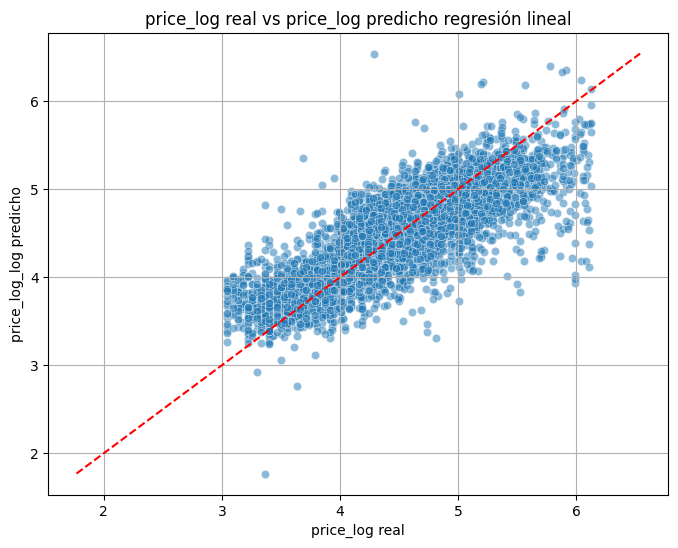

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)

max_val = max(max(y_test), max(y_test_pred))
min_val = min(min(y_test), min(y_test_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.xlabel('price_log real')
plt.ylabel('price_log_log predicho')
plt.title('price_log real vs price_log predicho regresión lineal')
plt.grid(True)
plt.show()

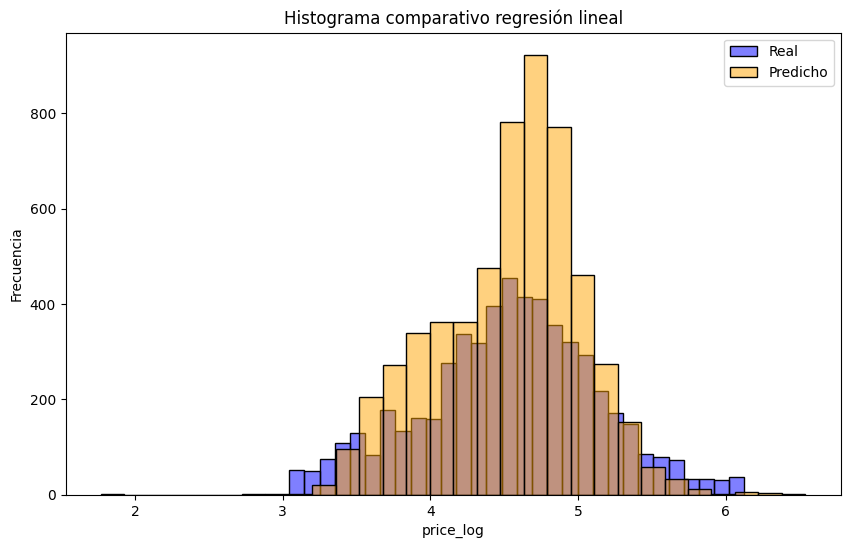

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Real', kde=False, stat="count", bins=30, alpha=0.5)
sns.histplot(y_test_pred, color='orange', label='Predicho', kde=False, stat="count", bins=30, alpha=0.5)
plt.title('Histograma comparativo regresión lineal')
plt.xlabel('price_log')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


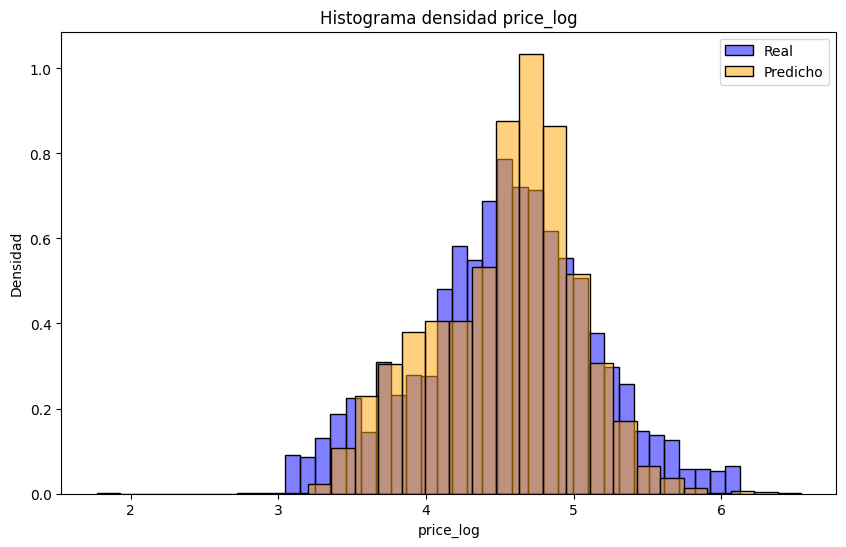

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Real', kde=False, stat="density", bins=30, alpha=0.5)
sns.histplot(y_test_pred, color='orange', label='Predicho', kde=False, stat="density", bins=30, alpha=0.5)
plt.title('Histograma densidad price_log')
plt.xlabel('price_log')
plt.ylabel('Densidad')
plt.legend()
plt.show()

####**L1**

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [21]:
X = listings.drop(columns=['price_log','id'])
y = listings['price_log']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X_scaled, y, ids, test_size=0.3, random_state=42)

In [22]:
ALPHAS = [0.0001, 0.0002, 0.00030, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009]
alphas = ALPHAS
#alphas = np.linspace(0.0001, 0.0003, 100)

lasso = Lasso(max_iter=10000)
param_grid = {'alpha': alphas}

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
print(f"Mejor valor de alpha: {best_alpha:.5f}")

Mejor valor de alpha: 0.00010


In [23]:
lasso_best = Lasso(alpha=best_alpha, max_iter=10000)
lasso_best.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=10000)

In [24]:
y_train_pred = lasso_best.predict(X_train)
y_test_pred = lasso_best.predict(X_test)

mse_train_log = mean_squared_error(y_train, y_train_pred)
rmse_train_log = root_mean_squared_error(y_train, y_train_pred)
r2_train_log = r2_score(y_train, y_train_pred)

mse_test_log = mean_squared_error(y_test, y_test_pred)
rmse_test_log = root_mean_squared_error(y_test, y_test_pred)
r2_test_log = r2_score(y_test, y_test_pred)

# Transformación métricas de error en escala monetaria
y_test_mon=np.exp(y_test)
y_test_pred_mon=np.exp(y_test_pred)
rmse_test_mon=root_mean_squared_error(y_test_mon, y_test_pred_mon)

mse_test_euros = mean_squared_error(np.exp(y_test), np.exp(y_test_pred))
rmse_test_euros = np.sqrt(mse_test_euros)

In [25]:
print("=== LASSO - TRAIN ===")
print(f"R²:   {r2_train_log:.4f}")
print(f"MSE:  {mse_train_log:.4f}")
print(f"RMSE: {rmse_train_log:.4f}")

print("\n=== LASSO - TEST ===")
print(f"R²:   {r2_test_log:.4f}")
print(f"MSE:  {mse_test_log:.4f}")
print(f"RMSE: {rmse_test_log:.4f}")

=== LASSO - TRAIN ===
R²:   0.6441
MSE:  0.1292
RMSE: 0.3595

=== LASSO - TEST ===
R²:   0.6395
MSE:  0.1296
RMSE: 0.3599


In [26]:
print(f'El MSE en euros es {mse_test_euros} y el RMSE es {rmse_test_euros}')

El MSE en euros es 2529.459106298785 y el RMSE es 50.29372829984654


In [27]:
# rmse en log sobre rango en log
rmse_test_log/(np.max(y_test)-np.min(y_test))

0.11677209876907275

In [28]:
# rmse en euros sobre rango en euros
y_test_euros=np.exp(y_test)
rmse_test_euros/(np.max(y_test_euros)-np.min(y_test_euros))

np.float64(0.11508862311177694)

In [29]:
# Para ver qué variables ha eliminado el modelo
coef_df = pd.DataFrame({
    'variable': listings.drop(columns=['price_log','id']).columns,
    'coeficiente': lasso_best.coef_
})
print(coef_df[coef_df['coeficiente'] == 0])  # variables eliminadas por Lasso


                  variable  coeficiente
8                     beds          0.0
19  review_scores_location         -0.0
43           rt_hotel_room         -0.0


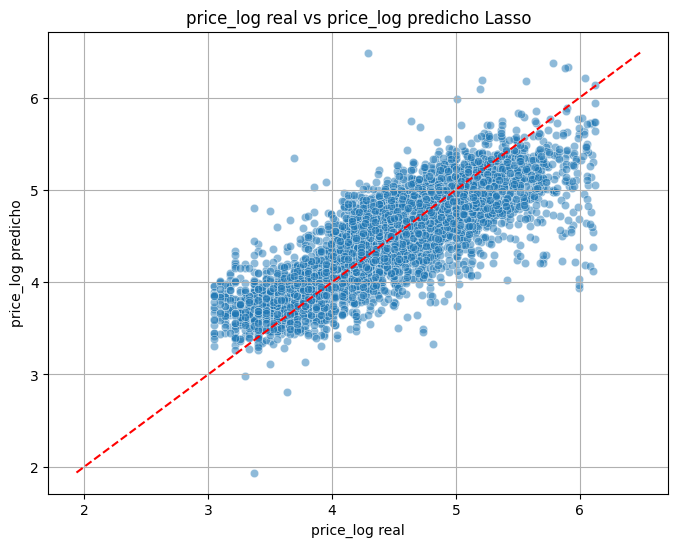

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)

max_val = max(max(y_test), max(y_test_pred))
min_val = min(min(y_test), min(y_test_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.xlabel('price_log real')
plt.ylabel('price_log predicho')
plt.title('price_log real vs price_log predicho Lasso')
plt.grid(True)
plt.show()

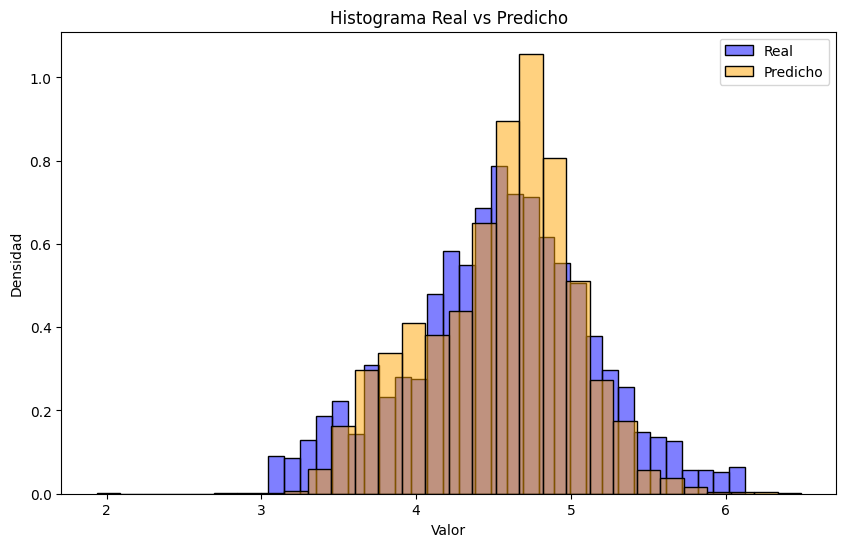

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Real', kde=False, stat="density", bins=30, alpha=0.5)
sns.histplot(y_test_pred, color='orange', label='Predicho', kde=False, stat="density", bins=30, alpha=0.5)
plt.title('Histograma Real vs Predicho')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

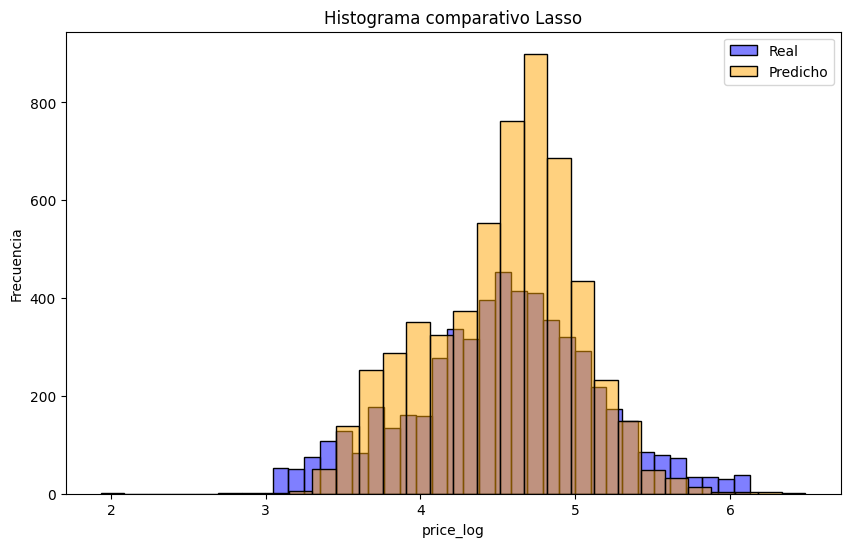

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Real', kde=False, stat="count", bins=30, alpha=0.5)
sns.histplot(y_test_pred, color='orange', label='Predicho', kde=False, stat="count", bins=30, alpha=0.5)
plt.title('Histograma comparativo Lasso')
plt.xlabel('price_log')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


####**L2**

In [33]:
X = listings.drop(columns=['price_log','id'])
y = listings['price_log']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X_scaled, y, ids, test_size=0.3, random_state=42)

In [34]:
alphas =  np.logspace(-5, 3, 20)

ridge = Ridge()
param_grid = {'alpha' : alphas}

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
print(f"Mejor valor de alpha: {best_alpha:.5f}")

Mejor valor de alpha: 0.16238


In [35]:
ridge_best = Ridge(alpha=best_alpha, max_iter=10000)
ridge_best.fit(X_train, y_train)

Ridge(alpha=np.float64(0.1623776739188721), max_iter=10000)

In [36]:
y_train_pred = ridge_best.predict(X_train)
y_test_pred = ridge_best.predict(X_test)

mse_train_log = mean_squared_error(y_train, y_train_pred)
rmse_train_log = root_mean_squared_error(y_train, y_train_pred)
r2_train_log = r2_score(y_train, y_train_pred)

mse_test_log = mean_squared_error(y_test, y_test_pred)
rmse_test_log = root_mean_squared_error(y_test, y_test_pred)
r2_test_log = r2_score(y_test, y_test_pred)

# Transformación métricas de error en escala monetaria
y_test_mon=np.exp(y_test)
y_test_pred_mon=np.exp(y_test_pred)
rmse_test_mon=root_mean_squared_error(y_test_mon, y_test_pred_mon)

mse_test_euros = mean_squared_error(np.exp(y_test), np.exp(y_test_pred))
rmse_test_euros = np.sqrt(mse_test_euros)

In [37]:
print("=== RIDGE - TRAIN ===")
print(f"R²:   {r2_train_log:.4f}")
print(f"MSE:  {mse_train_log:.4f}")
print(f"RMSE: {rmse_train_log:.4f}")

print("\n=== RIDGE - TEST ===")
print(f"R²:   {r2_test_log:.4f}")
print(f"MSE:  {mse_test_log:.4f}")
print(f"RMSE: {rmse_test_log:.4f}")

=== RIDGE - TRAIN ===
R²:   0.6445
MSE:  0.1291
RMSE: 0.3593

=== RIDGE - TEST ===
R²:   0.6385
MSE:  0.1299
RMSE: 0.3604


In [38]:
print(f'El MSE en euros es {mse_test_euros} y el RMSE es {rmse_test_euros}')

El MSE en euros es 2534.2694672602925 y el RMSE es 50.34152825709896


In [39]:
# rmse en log sobre rango en log
rmse_test_log/(np.max(y_test)-np.min(y_test))

0.11693133401796293

In [40]:
# rmse en euros sobre rango en euros
y_test_euros=np.exp(y_test)
rmse_test_euros/(np.max(y_test_euros)-np.min(y_test_euros))

np.float64(0.11519800516498613)

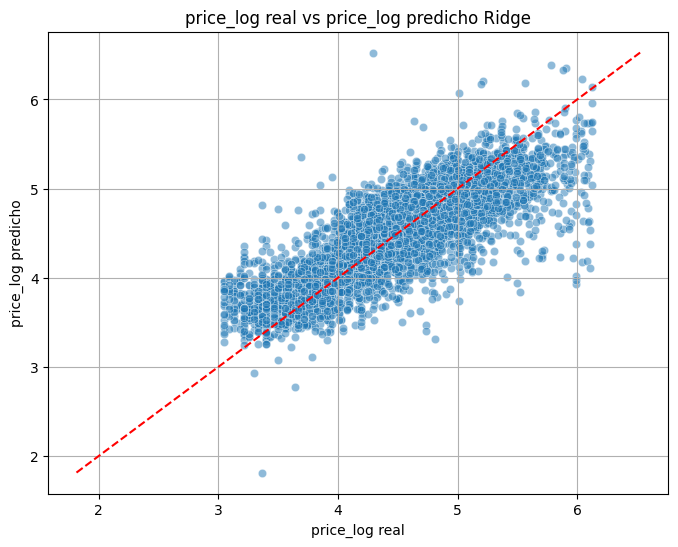

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)

max_val = max(max(y_test), max(y_test_pred))
min_val = min(min(y_test), min(y_test_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.xlabel('price_log real')
plt.ylabel('price_log predicho')
plt.title('price_log real vs price_log predicho Ridge')
plt.grid(True)
plt.show()

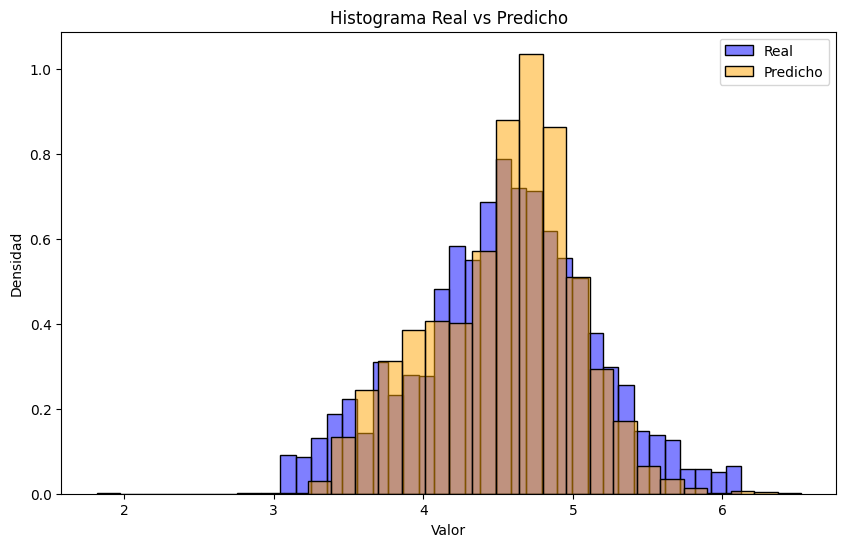

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Real', kde=False, stat="density", bins=30, alpha=0.5)
sns.histplot(y_test_pred, color='orange', label='Predicho', kde=False, stat="density", bins=30, alpha=0.5)
plt.title('Histograma Real vs Predicho')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

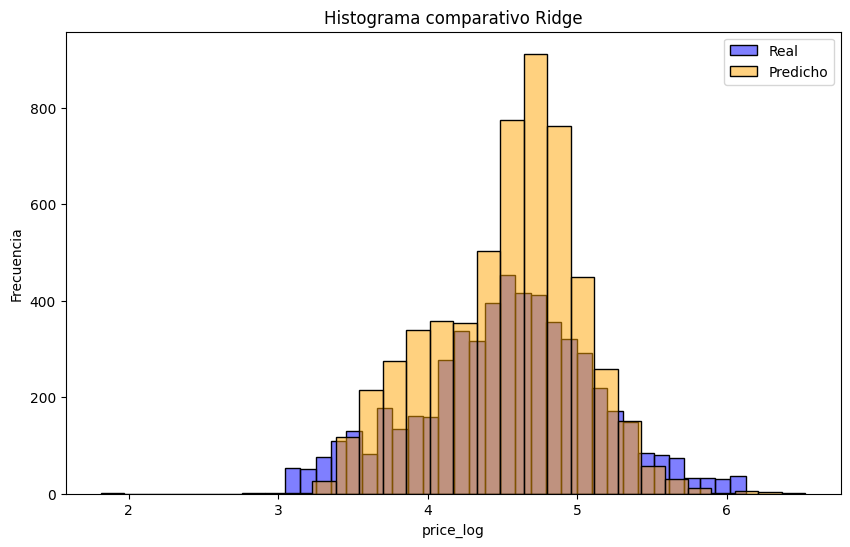

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Real', kde=False, stat="count", bins=30, alpha=0.5)
sns.histplot(y_test_pred, color='orange', label='Predicho', kde=False, stat="count", bins=30, alpha=0.5)
plt.title('Histograma comparativo Ridge')
plt.xlabel('price_log')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


####**Elastic Net**

In [44]:
X = listings.drop(columns=['price_log','id'])
y = listings['price_log']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X_scaled, y, ids, test_size=0.3, random_state=42)

In [45]:
from sklearn.linear_model import ElasticNet
alphas = np.logspace(-4, -1, 100)                 # 100 valores entre 1e-6 y 10
l1_ratios = np.linspace(0.1, 1.0, 10)            # 10 valores entre 0.1 y 1

elastic_net = ElasticNet(max_iter=100000)

param_grid = {'alpha': alphas,'l1_ratio': l1_ratios}

grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

print(f"Mejor valor de alpha: {best_alpha:.5f}")
print(f"Mejor valor de l1_ratio: {best_l1_ratio:.2f}")

Mejor valor de alpha: 0.00010
Mejor valor de l1_ratio: 0.50


In [46]:
elastic_net_best = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=100000)
elastic_net_best.fit(X_train, y_train)

ElasticNet(alpha=np.float64(0.0001), l1_ratio=np.float64(0.5), max_iter=100000)

In [47]:
y_train_pred = elastic_net_best.predict(X_train)
y_test_pred = elastic_net_best.predict(X_test)

mse_train_log = mean_squared_error(y_train, y_train_pred)
rmse_train_log = root_mean_squared_error(y_train, y_train_pred)
r2_train_log = r2_score(y_train, y_train_pred)

mse_test_log = mean_squared_error(y_test, y_test_pred)
rmse_test_log = root_mean_squared_error(y_test, y_test_pred)
r2_test_log = r2_score(y_test, y_test_pred)

# Transformación métricas de error en escala monetaria
y_test_mon=np.exp(y_test)
y_test_pred_mon=np.exp(y_test_pred)
rmse_test_mon=root_mean_squared_error(y_test_mon, y_test_pred_mon)

mse_test_euros = mean_squared_error(np.exp(y_test), np.exp(y_test_pred))
rmse_test_euros = np.sqrt(mse_test_euros)

In [48]:
print("=== ELASTIC NET - TRAIN ===")
print(f"R²:   {r2_train_log:.4f}")
print(f"MSE:  {mse_train_log:.4f}")
print(f"RMSE: {rmse_train_log:.4f}")

print("\n=== ELASTIC NET - TEST ===")
print(f"R²:   {r2_test_log:.4f}")
print(f"MSE:  {mse_test_log:.4f}")
print(f"RMSE: {rmse_test_log:.4f}")

=== ELASTIC NET - TRAIN ===
R²:   0.6442
MSE:  0.1292
RMSE: 0.3594

=== ELASTIC NET - TEST ===
R²:   0.6394
MSE:  0.1296
RMSE: 0.3600


In [49]:
print(f'El MSE en euros es {mse_test_euros} y el RMSE es {rmse_test_euros}')

El MSE en euros es 2524.5096986990843 y el RMSE es 50.24449918845927


In [50]:
# rmse en log sobre rango en log
rmse_test_log/(np.max(y_test)-np.min(y_test))

0.11678672296221611

In [51]:
# rmse en euros sobre rango en euros
y_test_euros=np.exp(y_test)
rmse_test_euros/(np.max(y_test_euros)-np.min(y_test_euros))

np.float64(0.11497597068297312)

In [52]:
coef_df = pd.DataFrame({
    'variable': listings.drop(columns=['price_log','id']).columns,
    'coeficiente': elastic_net_best.coef_
})
print(coef_df[coef_df['coeficiente'] == 0])

                  variable  coeficiente
19  review_scores_location         -0.0


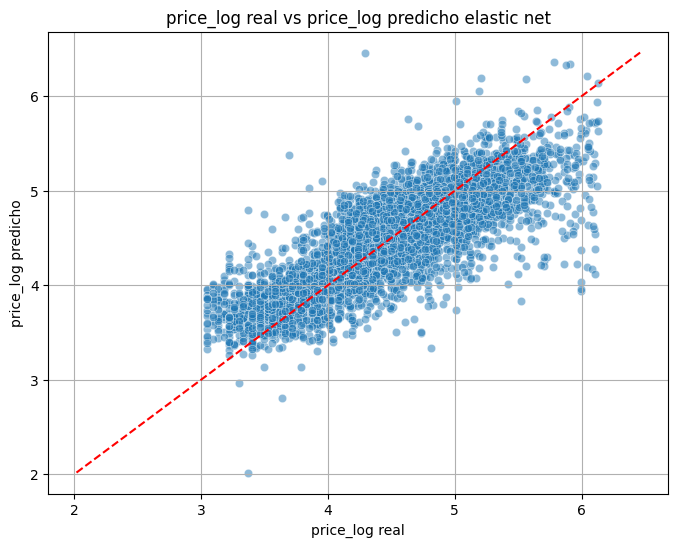

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)

max_val = max(max(y_test), max(y_test_pred))
min_val = min(min(y_test), min(y_test_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.xlabel('price_log real')
plt.ylabel('price_log predicho')
plt.title('price_log real vs price_log predicho elastic net')
plt.grid(True)
plt.show()

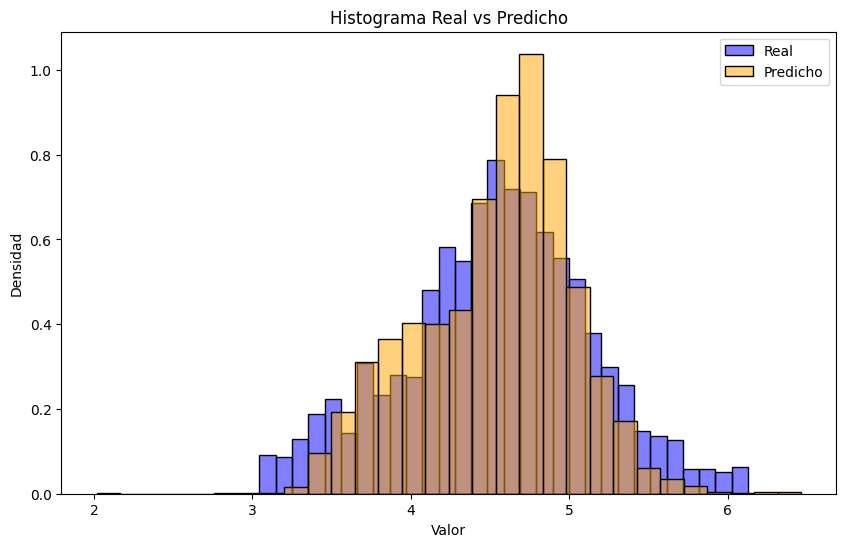

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Real', kde=False, stat="density", bins=30, alpha=0.5)
sns.histplot(y_test_pred, color='orange', label='Predicho', kde=False, stat="density", bins=30, alpha=0.5)
plt.title('Histograma Real vs Predicho')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

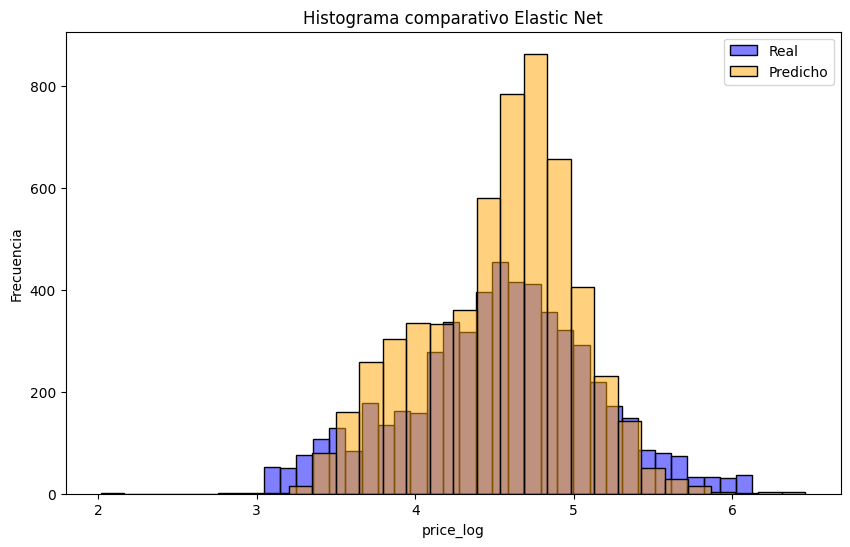

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Real', kde=False, stat="count", bins=30, alpha=0.5)
sns.histplot(y_test_pred, color='orange', label='Predicho', kde=False, stat="count", bins=30, alpha=0.5)
plt.title('Histograma comparativo Elastic Net')
plt.xlabel('price_log')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

####**Random Forest**

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

In [57]:
X = listings.drop(columns=['price_log','id'])
y = listings['price_log']

In [58]:
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, ids, test_size=0.3, random_state=42)

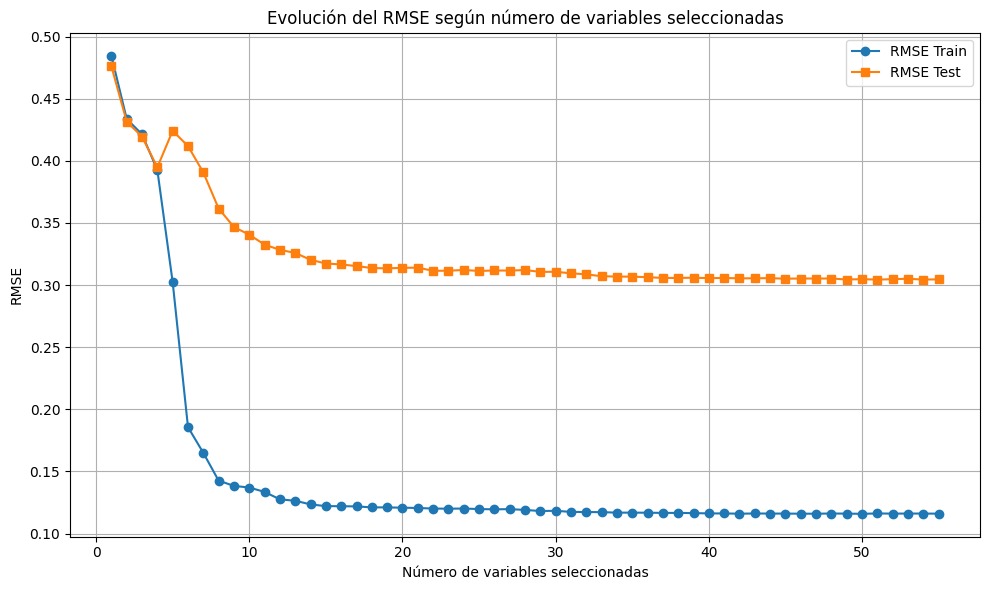

In [59]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)
train_rmse = [] # lista donde meter el rmse en train
test_rmse = [] #lista donde meter el rmse en test
num_vars_list = list(range(1, len(importances_sorted)+1)) # desde 1 hasta el total de variables
for i in num_vars_list:
    selected_features = importances_sorted.index[:i]

    rf_i = RandomForestRegressor(random_state=42)
    rf_i.fit(X_train[selected_features], y_train)

    y_train_pred = rf_i.predict(X_train[selected_features])
    y_test_pred = rf_i.predict(X_test[selected_features])

    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
plt.figure(figsize=(10, 6))
plt.plot(num_vars_list, train_rmse, label="RMSE Train", marker='o')
plt.plot(num_vars_list, test_rmse, label="RMSE Test", marker='s')
plt.xlabel("Número de variables seleccionadas")
plt.ylabel("RMSE")
plt.title("Evolución del RMSE según número de variables seleccionadas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
# Encontrar el número óptimo de variables (mínimo RMSE en test)
min_rmse_test = min(test_rmse)
optimal_index = test_rmse.index(min_rmse_test)
optimal_num_vars = num_vars_list[optimal_index]

print(f"Número óptimo de variables: {optimal_num_vars}")
print(f"RMSE mínimo en test: {min_rmse_test:.4f}")

Número óptimo de variables: 51
RMSE mínimo en test: 0.3044


In [ ]:
# Método rápido si ya se sabe el número de variables para no tener que hacer el gráfico
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)


importances = pd.Series(rf.feature_importances_, index=X.columns)
top_vars = importances.sort_values(ascending=False).head(51).index # 51 es el número de variables óptimas
X_train=X_train[top_vars]
X_test=X_test[top_vars]

In [61]:
top_k = optimal_num_vars
selected_features = importances.sort_values(ascending=False).index[:top_k]
X_train=X_train[selected_features]
X_test=X_test[selected_features]

In [62]:
X_train.shape

(13092, 51)

In [63]:
X_test.shape

(5611, 51)

In [65]:
param_grid_rf = {
    'n_estimators': [300, 400, 500],
    'max_depth': [None, 2 , 4],
    'min_samples_split': [2, 3, 4],
}
rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print("Mejores hiperparámetros:", grid_rf.best_params_)

Mejores hiperparámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 400}


In [67]:
best_n_estimators = grid_rf.best_params_['n_estimators']
best_max_depth = grid_rf.best_params_['max_depth']
best_min_samples_split = grid_rf.best_params_['min_samples_split']

In [68]:
rf = RandomForestRegressor(n_estimators = best_n_estimators, max_depth = best_max_depth, min_samples_split = best_min_samples_split, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=400, random_state=42)

In [69]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)


mse_train_log = mean_squared_error(y_train, y_train_pred)
rmse_train_log = root_mean_squared_error(y_train, y_train_pred)
r2_train_log = r2_score(y_train, y_train_pred)

mse_test_log = mean_squared_error(y_test, y_test_pred)
rmse_test_log = root_mean_squared_error(y_test, y_test_pred)
r2_test_log = r2_score(y_test, y_test_pred)

# métricas en euros
mse_test_euros = mean_squared_error(np.exp(y_test), np.exp(y_test_pred))
rmse_test_euros = np.sqrt(mse_test_euros)

In [70]:
print("=== RF - TRAIN ===")
print(f"R²:   {r2_train_log:.4f}")
print(f"MSE:  {mse_train_log:.4f}")
print(f"RMSE: {rmse_train_log:.4f}")

print("\n=== RF - TEST ===")
print(f"R²:   {r2_test_log:.4f}")
print(f"MSE:  {mse_test_log:.4f}")
print(f"RMSE: {rmse_test_log:.4f}")

=== RF - TRAIN ===
R²:   0.9640
MSE:  0.0131
RMSE: 0.1143

=== RF - TEST ===
R²:   0.7436
MSE:  0.0921
RMSE: 0.3035


In [71]:
print(f'El MSE en euros es {mse_test_euros} y el RMSE es {rmse_test_euros}')

El MSE en euros es 1828.319708426365 y el RMSE es 42.7588553217502


In [72]:
# rmse en log sobre rango en log
rmse_test_log/(np.max(y_test)-np.min(y_test))

0.0984792162596369

In [73]:
# rmse en euros sobre rango en euros
y_test_euros=np.exp(y_test)
rmse_test_euros/(np.max(y_test_euros)-np.min(y_test_euros))

np.float64(0.09784635085068691)

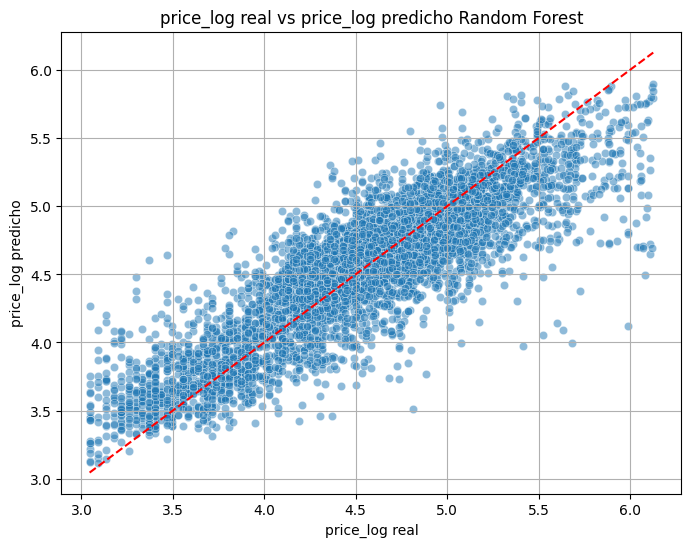

In [74]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)

max_val = max(max(y_test), max(y_test_pred))
min_val = min(min(y_test), min(y_test_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.xlabel('price_log real')
plt.ylabel('price_log predicho')
plt.title('price_log real vs price_log predicho Random Forest')
plt.grid(True)
plt.show()

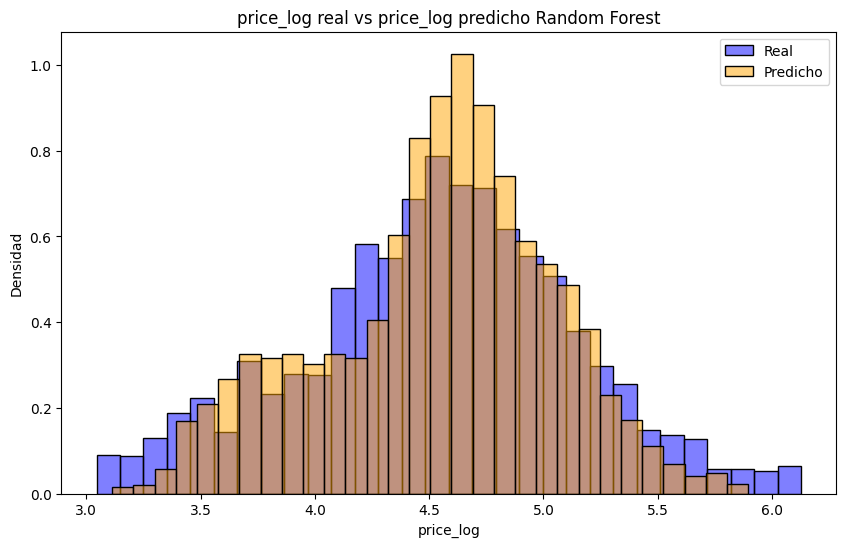

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Real', kde=False, stat="density", bins=30, alpha=0.5)
sns.histplot(y_test_pred, color='orange', label='Predicho', kde=False, stat="density", bins=30, alpha=0.5)
plt.title('price_log real vs price_log predicho Random Forest')
plt.xlabel('price_log')
plt.ylabel('Densidad')
plt.legend()
plt.show()

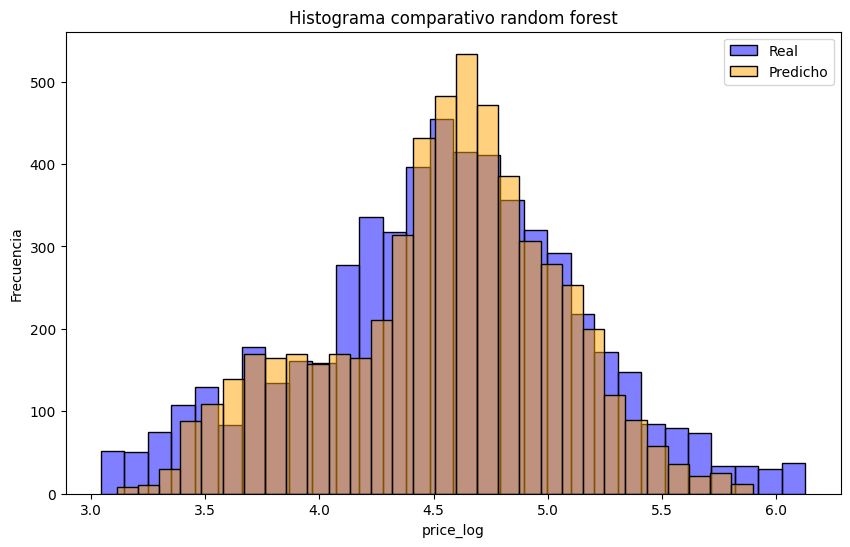

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Real', kde=False, stat="count", bins=30, alpha=0.5)
sns.histplot(y_test_pred, color='orange', label='Predicho', kde=False, stat="count", bins=30, alpha=0.5)
plt.title('Histograma comparativo random forest')
plt.xlabel('price_log')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


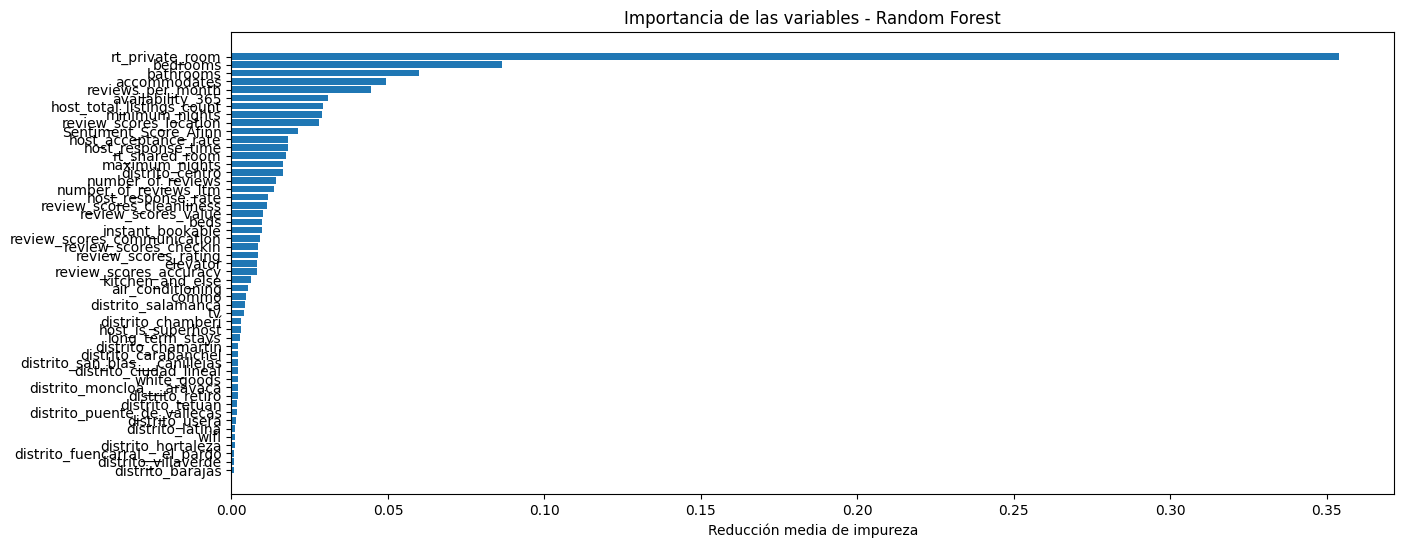

In [77]:
# importancias en train
importancias = rf.feature_importances_
caracteristicas = X_train.columns

# Crear DataFrame
df_importancias = pd.DataFrame({
    'Variable': caracteristicas,
    'Importancia': importancias
})



# Ordenar de mayor a menor importancia
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(15, 6))
plt.barh(df_importancias['Variable'], df_importancias['Importancia'])
plt.gca().invert_yaxis()
plt.title('Importancia de las variables - Random Forest')
plt.xlabel('Reducción media de impureza')
plt.show()


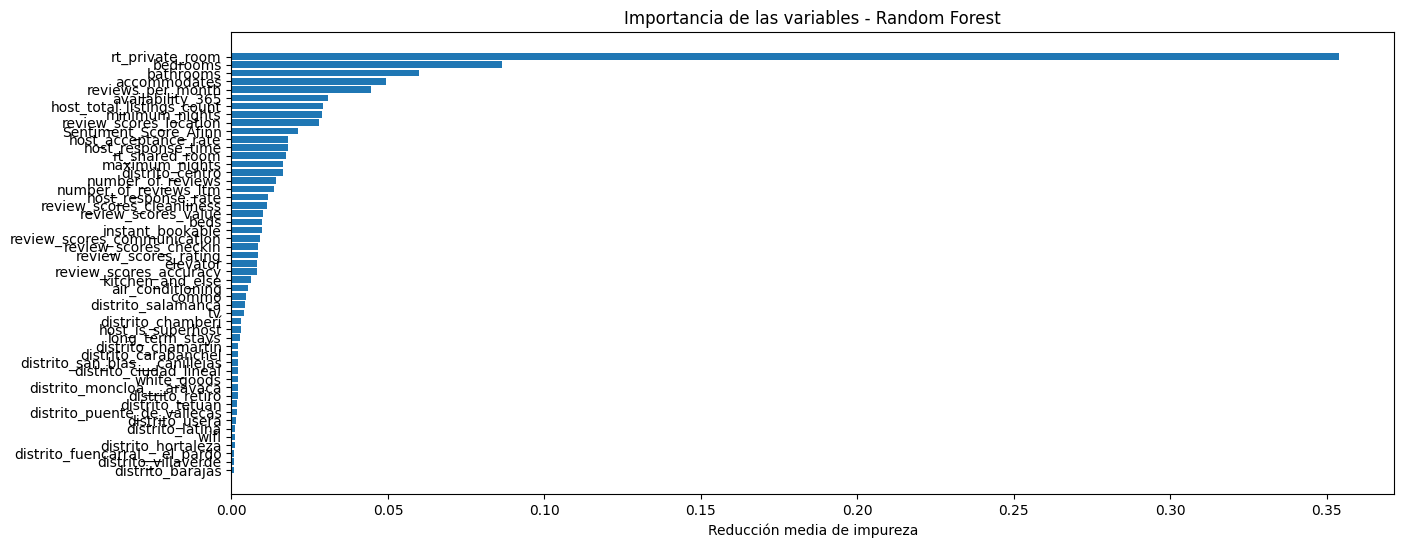

In [78]:
# importancias en test
importancias = rf.feature_importances_
caracteristicas = X_test.columns

# Crear DataFrame
df_importancias = pd.DataFrame({
    'Variable': caracteristicas,
    'Importancia': importancias
})

df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(15, 6))
plt.barh(df_importancias['Variable'], df_importancias['Importancia'])
plt.gca().invert_yaxis()
plt.title('Importancia de las variables - Random Forest')
plt.xlabel('Reducción media de impureza')
plt.show()

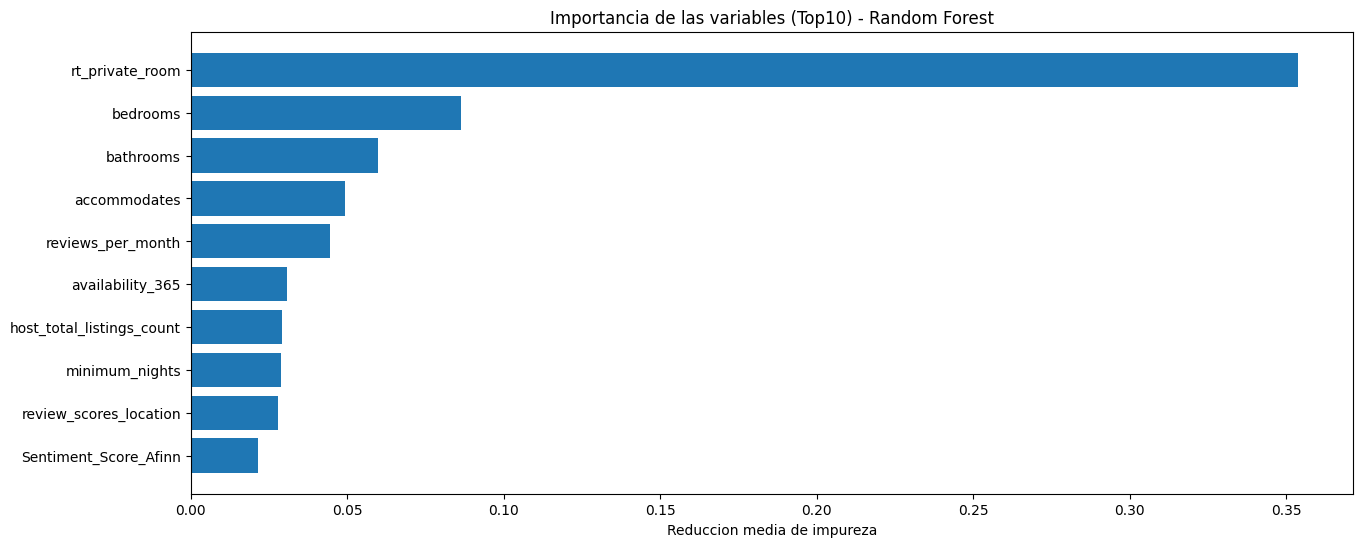

In [79]:
# Top 10 importancias en train
importancias = rf.feature_importances_
caracteristicas = X_train.columns

# Crear DataFrame
df_importancias = pd.DataFrame({
    'Variable': caracteristicas,
    'Importancia': importancias
})


df_importancias = df_importancias.sort_values(by='Importancia', ascending=False).head(10)

plt.figure(figsize=(15, 6))
plt.barh(df_importancias['Variable'], df_importancias['Importancia'])
plt.gca().invert_yaxis()
plt.title('Importancia de las variables (Top10) - Random Forest')
plt.xlabel('Reduccion media de impureza')
plt.show()

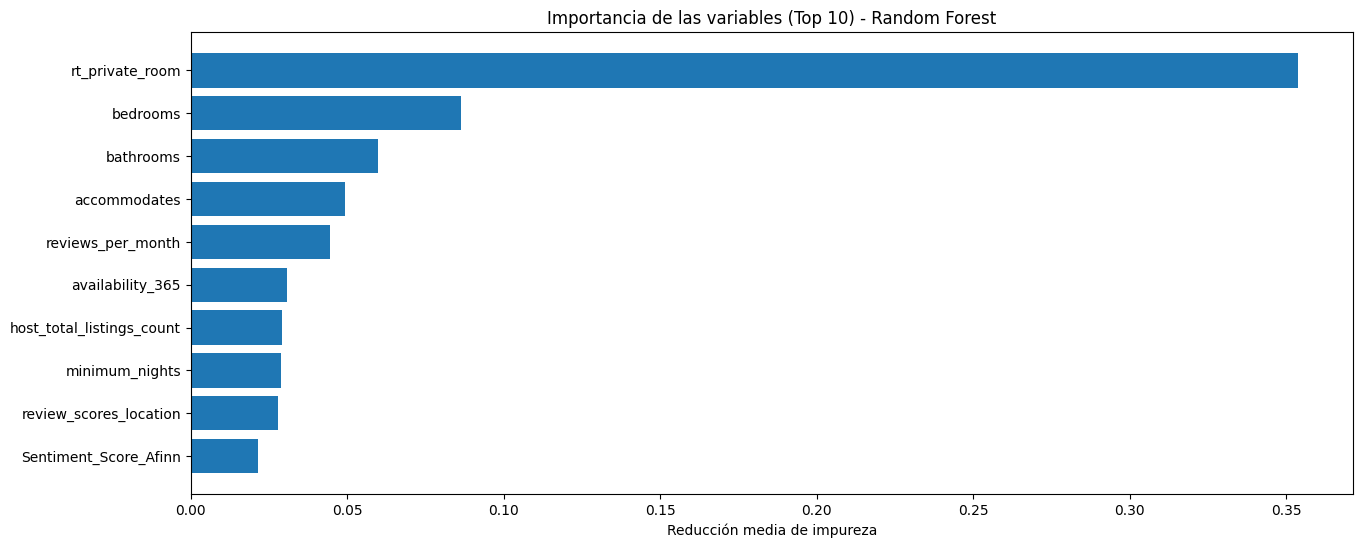

In [80]:
# Top 10 importancias en test
importancias = rf.feature_importances_
caracteristicas = X_test.columns

# Crear DataFrame
df_importancias = pd.DataFrame({
    'Variable': caracteristicas,
    'Importancia': importancias
})

#df_importancias = df_importancias[df_importancias['Importancia'] > 0].head(10)

# Ordenar de mayor a menor importancia
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False).head(10)

# Visualización
plt.figure(figsize=(15, 6))
plt.barh(df_importancias['Variable'], df_importancias['Importancia'])
plt.gca().invert_yaxis()
plt.title('Importancia de las variables (Top 10) - Random Forest')
plt.xlabel('Reducción media de impureza')
plt.show()

####**Gradient Boosting**

In [81]:
X = listings.drop(columns=['price_log','id'])
y = listings['price_log']

In [82]:
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, ids, test_size=0.3, random_state=42)

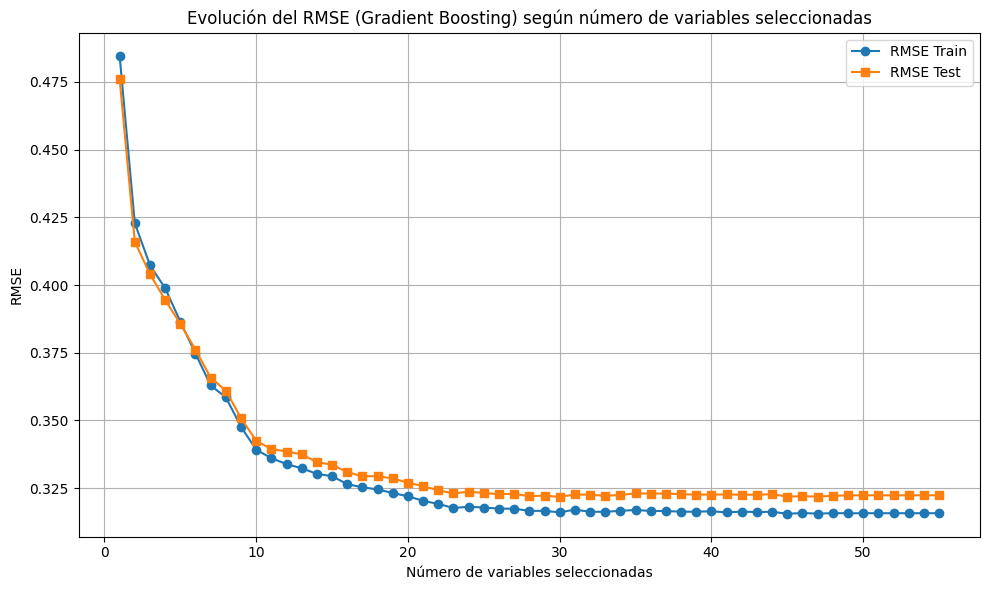

In [83]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
importances = pd.Series(gb.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)
train_rmse = []
test_rmse = []
num_vars_list = list(range(1, len(importances_sorted)+1))
for i in num_vars_list:
    selected_features = importances_sorted.index[:i]

    gb_i = GradientBoostingRegressor(random_state=42)
    gb_i.fit(X_train[selected_features], y_train)

    y_train_pred = gb_i.predict(X_train[selected_features])
    y_test_pred = gb_i.predict(X_test[selected_features])

    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
plt.figure(figsize=(10, 6))
plt.plot(num_vars_list, train_rmse, label="RMSE Train", marker='o')
plt.plot(num_vars_list, test_rmse, label="RMSE Test", marker='s')
plt.xlabel("Número de variables seleccionadas")
plt.ylabel("RMSE")
plt.title("Evolución del RMSE (Gradient Boosting) según número de variables seleccionadas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [84]:
min_rmse_test = min(test_rmse)
optimal_index = test_rmse.index(min_rmse_test)
optimal_num_vars = num_vars_list[optimal_index]

print(f"Número óptimo de variables: {optimal_num_vars}")
print(f"RMSE mínimo en test: {min_rmse_test:.4f}")

Número óptimo de variables: 30
RMSE mínimo en test: 0.3218


In [85]:
top_k = optimal_num_vars
selected_features = importances.sort_values(ascending=False).index[:top_k]
X_train=X_train[selected_features]
X_test=X_test[selected_features]

In [ ]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

importances = pd.Series(gb.feature_importances_, index=X.columns)
top_vars = importances.sort_values(ascending=False).head(30).index
X_train=X_train[top_vars]
X_test=X_test[top_vars]

In [86]:
selected_features

Index(['rt_private_room', 'accommodates', 'bedrooms', 'bathrooms',
       'reviews_per_month', 'minimum_nights', 'distrito_centro',
       'rt_shared_room', 'review_scores_location', 'host_response_time',
       'elevator', 'kitchen_and_else', 'tv', 'distrito_salamanca',
       'air_conditioning', 'Sentiment_Score_Afinn', 'instant_bookable', 'beds',
       'maximum_nights', 'distrito_chamberí', 'availability_365',
       'review_scores_cleanliness', 'host_total_listings_count',
       'distrito_carabanchel', 'number_of_reviews_ltm', 'distrito_usera',
       'commo', 'distrito_puente_de_vallecas', 'host_acceptance_rate',
       'host_response_rate'],
      dtype='object')

In [87]:
X_train.shape

(13092, 30)

In [88]:
X_test.shape

(5611, 30)

In [94]:
param_grid_gb = {
    'n_estimators': [300, 400, 500, 600],
    'learning_rate': [0.1, 0.15],
    'max_depth': [5, 6, 7]
}

gb = GradientBoostingRegressor(random_state=42)
grid_gb = GridSearchCV(gb, param_grid_gb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_gb.fit(X_train, y_train)
best_gb = grid_gb.best_estimator_
print("Mejores hiperparámetros:", grid_gb.best_params_)

Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300}


In [96]:
best_n_estimators = grid_gb.best_params_['n_estimators']
best_max_depth = grid_gb.best_params_['max_depth']
best_learning_rate = grid_gb.best_params_['learning_rate']

In [97]:
gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=6 ,random_state=42)
gb.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=6, n_estimators=300, random_state=42)

In [98]:
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

mse_train_log = mean_squared_error(y_train, y_train_pred)
rmse_train_log = root_mean_squared_error(y_train, y_train_pred)
r2_train_log = r2_score(y_train, y_train_pred)

mse_test_log = mean_squared_error(y_test, y_test_pred)
rmse_test_log = root_mean_squared_error(y_test, y_test_pred)
r2_test_log = r2_score(y_test, y_test_pred)

# métricas en euros
mse_test_euros = mean_squared_error(np.exp(y_test), np.exp(y_test_pred))
rmse_test_euros = np.sqrt(mse_test_euros)

In [93]:
print("=== GB - TRAIN ===")
print(f"R²:   {r2_train_log:.4f}")
print(f"MSE:  {mse_train_log:.4f}")
print(f"RMSE: {rmse_train_log:.4f}")

print("\n=== GB - TEST ===")
print(f"R²:   {r2_test_log:.4f}")
print(f"MSE:  {mse_test_log:.4f}")
print(f"RMSE: {rmse_test_log:.4f}")

=== GB - TRAIN ===
R²:   0.9066
MSE:  0.0339
RMSE: 0.1842

=== GB - TEST ===
R²:   0.7639
MSE:  0.0849
RMSE: 0.2913


In [99]:
print(f'El MSE en euros es {mse_test_euros} y el RMSE es {rmse_test_euros}')

El MSE en euros es 1678.9917286009638 y el RMSE es 40.97550156619152


In [100]:
# rmse en log sobre rango en log
rmse_test_log/(np.max(y_test)-np.min(y_test))

0.09451129465430975

In [101]:
# rmse en euros sobre rango en euros
y_test_euros=np.exp(y_test)
rmse_test_euros/(np.max(y_test_euros)-np.min(y_test_euros))

np.float64(0.09376544980821853)

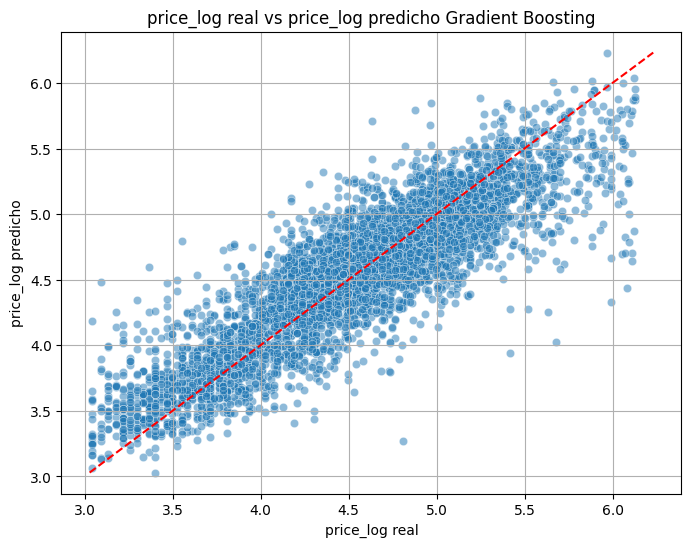

In [102]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)

# Línea de referencia (perfecta predicción)
max_val = max(max(y_test), max(y_test_pred))
min_val = min(min(y_test), min(y_test_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.xlabel('price_log real')
plt.ylabel('price_log predicho')
plt.title('price_log real vs price_log predicho Gradient Boosting')
plt.grid(True)
plt.show()

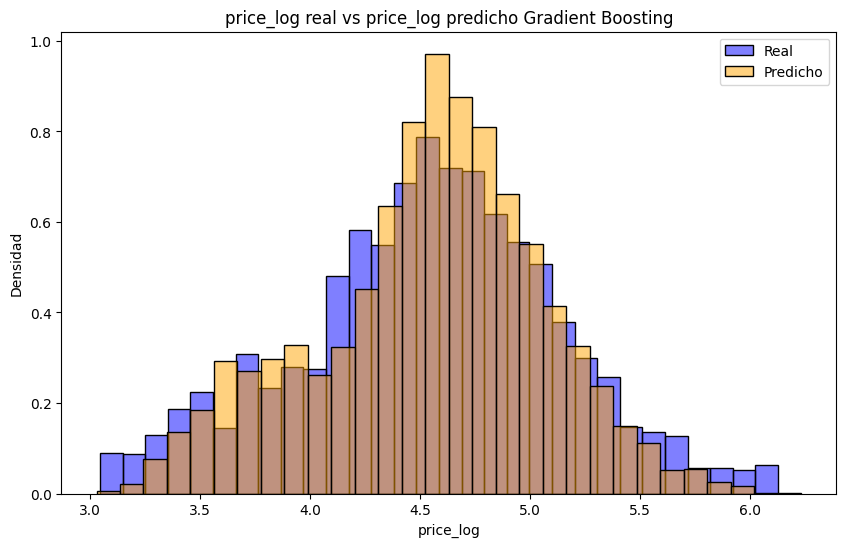

In [103]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Real', kde=False, stat="density", bins=30, alpha=0.5)
sns.histplot(y_test_pred, color='orange', label='Predicho', kde=False, stat="density", bins=30, alpha=0.5)
plt.title('price_log real vs price_log predicho Gradient Boosting')
plt.xlabel('price_log')
plt.ylabel('Densidad')
plt.legend()
plt.show()

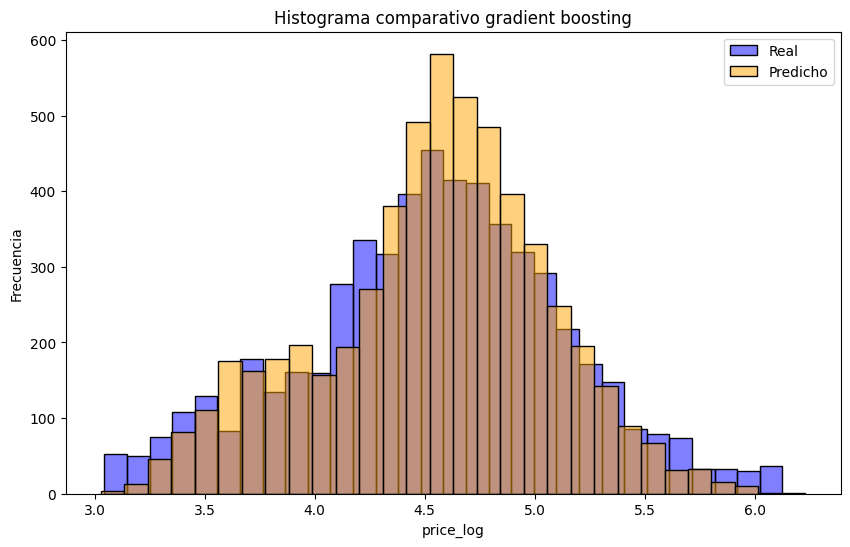

In [104]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Real', kde=False, stat="count", bins=30, alpha=0.5)
sns.histplot(y_test_pred, color='orange', label='Predicho', kde=False, stat="count", bins=30, alpha=0.5)
plt.title('Histograma comparativo gradient boosting')
plt.xlabel('price_log')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

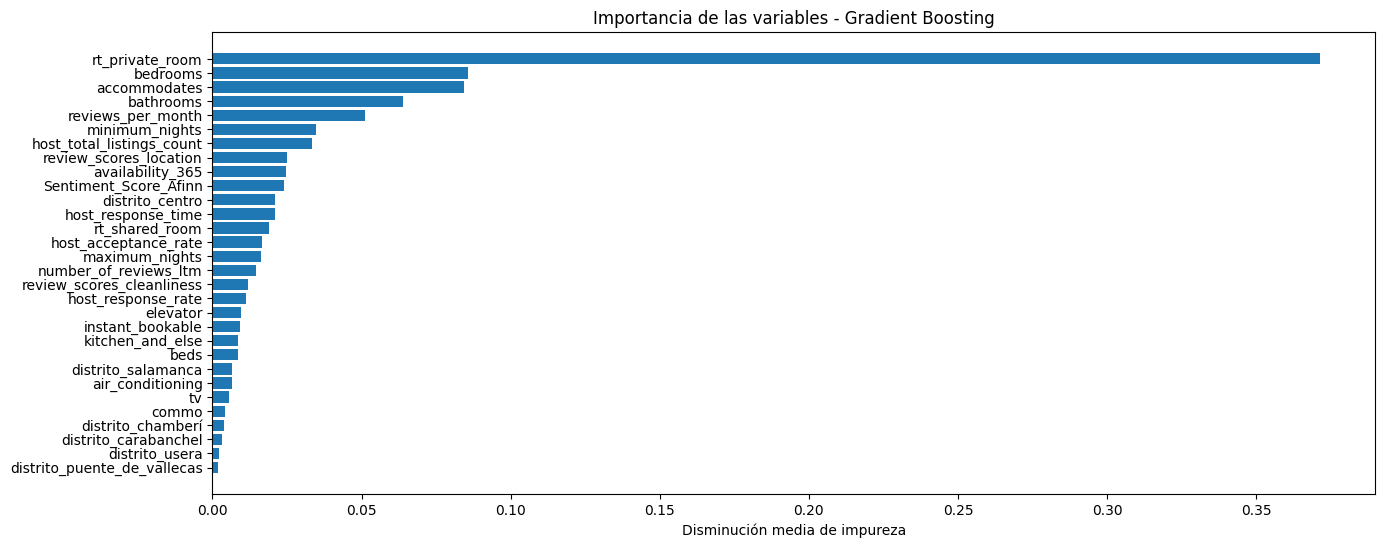

In [105]:
# importancia de variables en train
importancias = gb.feature_importances_
caracteristicas = X_train.columns

# Crear DataFrame
df_importancias = pd.DataFrame({
    'Variable': caracteristicas,
    'Importancia': importancias
})


df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(15, 6))
plt.barh(df_importancias['Variable'], df_importancias['Importancia'])
plt.gca().invert_yaxis()
plt.title('Importancia de las variables - Gradient Boosting')
plt.xlabel('Disminución media de impureza')
plt.show()

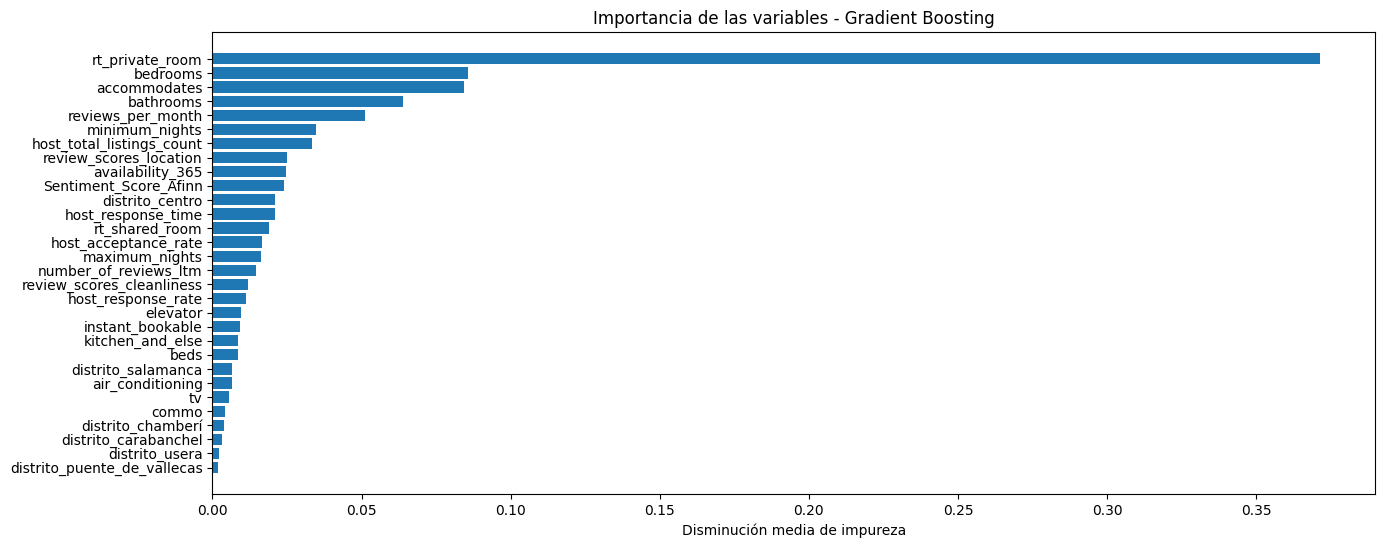

In [106]:
# importancia de variables en test
importancias = gb.feature_importances_
caracteristicas = X_test.columns

df_importancias = pd.DataFrame({
    'Variable': caracteristicas,
    'Importancia': importancias
})


df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(15, 6))
plt.barh(df_importancias['Variable'], df_importancias['Importancia'])
plt.gca().invert_yaxis()
plt.title('Importancia de las variables - Gradient Boosting')
plt.xlabel('Disminución media de impureza')
plt.show()

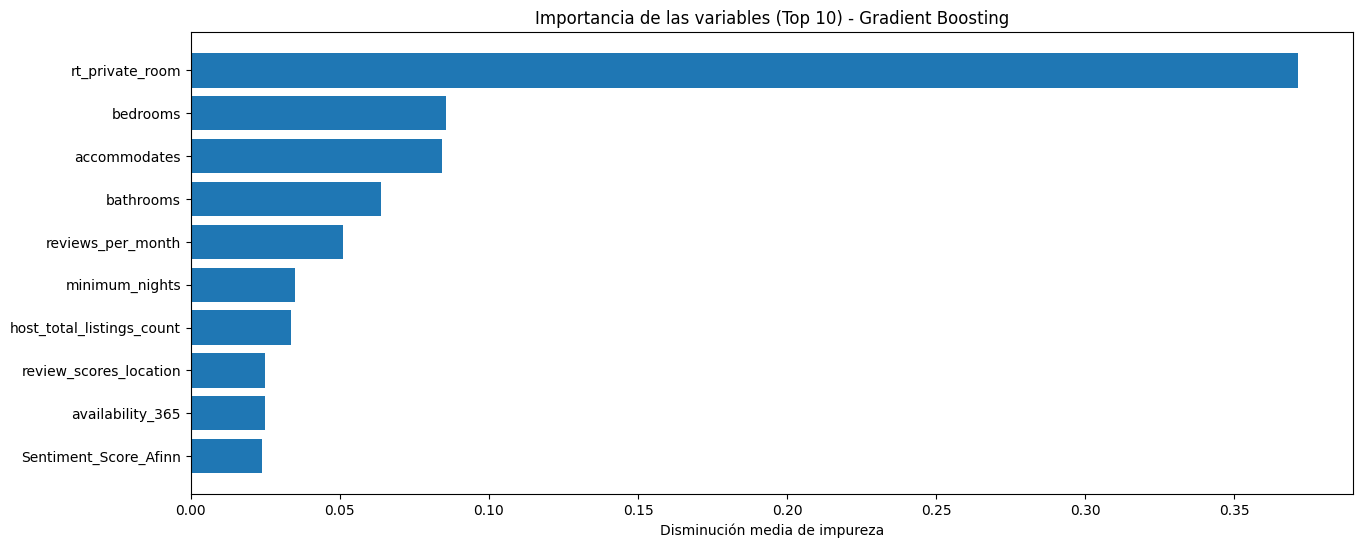

In [107]:
# Top 10 variables importantes en train
importancias = gb.feature_importances_
caracteristicas = X_train.columns

df_importancias = pd.DataFrame({
    'Variable': caracteristicas,
    'Importancia': importancias
})

df_importancias = df_importancias.sort_values(by='Importancia', ascending=False).head(10)


plt.figure(figsize=(15, 6))
plt.barh(df_importancias['Variable'], df_importancias['Importancia'])
plt.gca().invert_yaxis()
plt.title('Importancia de las variables (Top 10) - Gradient Boosting')
plt.xlabel('Disminución media de impureza')
plt.show()

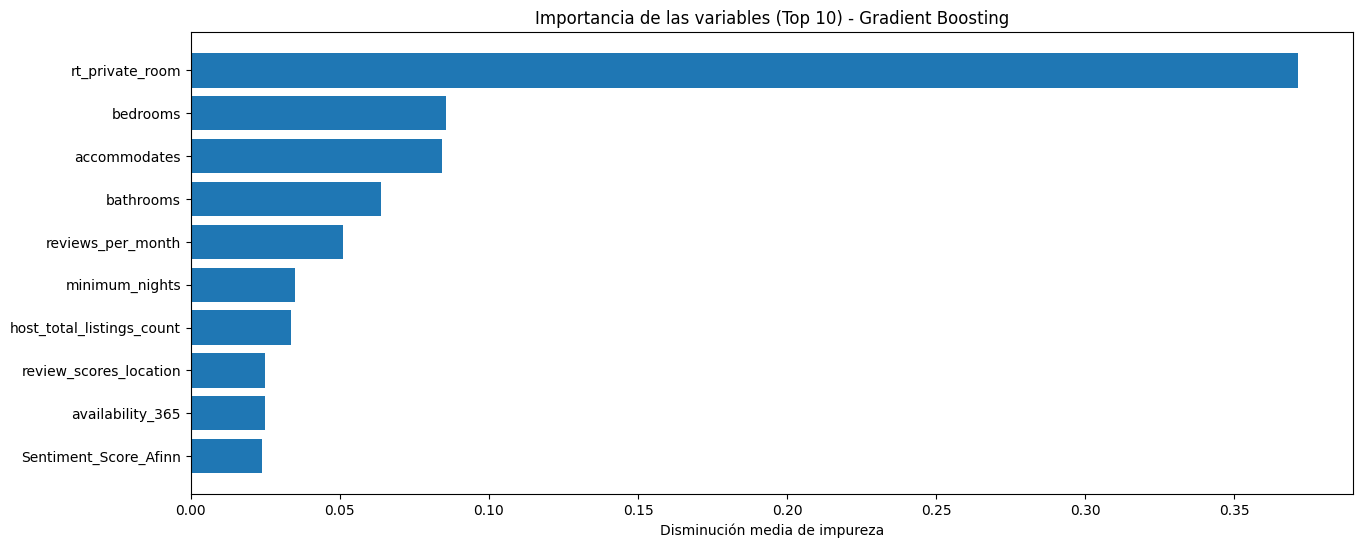

In [108]:
# Top 10 variables importantes en test
importancias = gb.feature_importances_
caracteristicas = X_test.columns


df_importancias = pd.DataFrame({
    'Variable': caracteristicas,
    'Importancia': importancias
})


df_importancias = df_importancias.sort_values(by='Importancia', ascending=False).head(10)

plt.figure(figsize=(15, 6))
plt.barh(df_importancias['Variable'], df_importancias['Importancia'])
plt.gca().invert_yaxis()
plt.title('Importancia de las variables (Top 10) - Gradient Boosting')
plt.xlabel('Disminución media de impureza')
plt.show()

####**XGBoost**

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
X = listings.drop(columns=['price_log','id'])
y = listings['price_log']

In [ ]:
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, ids, test_size=0.3, random_state=42)

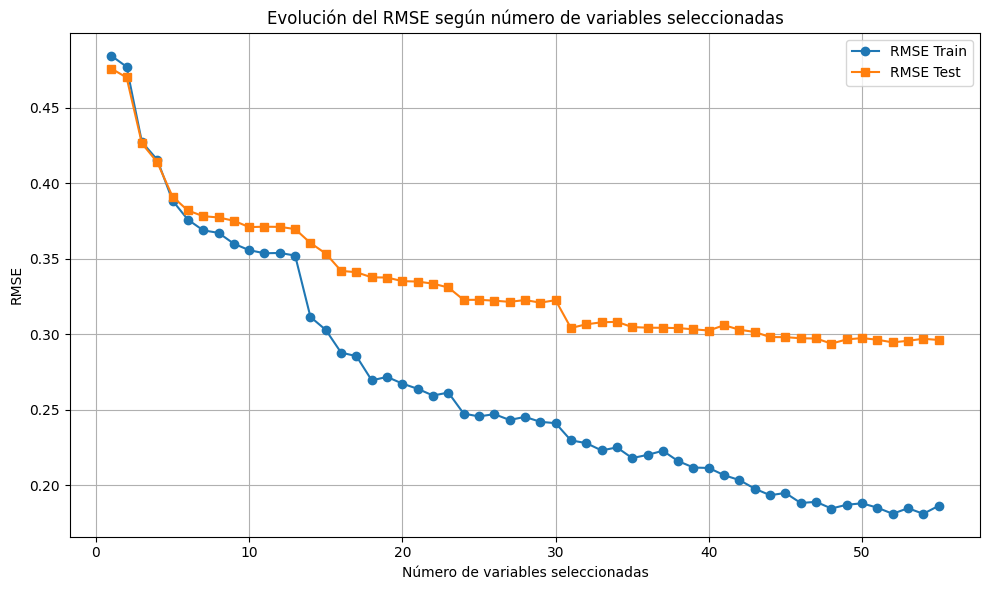

In [ ]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
importances = pd.Series(xgb.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)
train_rmse = []
test_rmse = []
num_vars_list = list(range(1, len(importances_sorted)+1))
for i in num_vars_list:
    selected_features = importances_sorted.index[:i]

    xgb_i = XGBRegressor(random_state=42)
    xgb_i.fit(X_train[selected_features], y_train)

    y_train_pred = xgb_i.predict(X_train[selected_features])
    y_test_pred = xgb_i.predict(X_test[selected_features])
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
plt.figure(figsize=(10, 6))
plt.plot(num_vars_list, train_rmse, label="RMSE Train", marker='o')
plt.plot(num_vars_list, test_rmse, label="RMSE Test", marker='s')
plt.xlabel("Número de variables seleccionadas")
plt.ylabel("RMSE")
plt.title("Evolución del RMSE según número de variables seleccionadas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Encontrar el número óptimo de variables (mínimo RMSE en test)
min_rmse_test = min(test_rmse)
optimal_index = test_rmse.index(min_rmse_test)
optimal_num_vars = num_vars_list[optimal_index]

print(f"Número óptimo de variables: {optimal_num_vars}")
print(f"RMSE mínimo en test: {min_rmse_test:.4f}")

Número óptimo de variables: 48
RMSE mínimo en test: 0.2938


In [ ]:
top_k = optimal_num_vars
selected_features = importances.sort_values(ascending=False).index[:top_k]
X_train=X_train[selected_features]
X_test=X_test[selected_features]

In [ ]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

# Importancia de variables
importances = pd.Series(xgb.feature_importances_, index=X.columns)
top_vars = importances.sort_values(ascending=False).head(48).index
X_train=X_train[top_vars]
X_test=X_test[top_vars]

In [ ]:
selected_features

Index(['rt_private_room', 'rt_shared_room', 'bedrooms', 'bathrooms',
       'distrito_centro', 'accommodates', 'kitchen_and_else',
       'distrito_salamanca', 'distrito_usera', 'distrito_carabanchel',
       'instant_bookable', 'elevator', 'distrito_puente_de_vallecas',
       'distrito_chamberí', 'tv', 'distrito_latina',
       'distrito_villa_de_vallecas', 'reviews_per_month', 'minimum_nights',
       'rt_hotel_room', 'host_response_time', 'distrito_san_blas___canillejas',
       'air_conditioning', 'distrito_chamartín', 'distrito_retiro',
       'distrito_moncloa___aravaca', 'distrito_barajas', 'commo',
       'distrito_villaverde', 'distrito_hortaleza', 'Sentiment_Score_Afinn',
       'distrito_fuencarral___el_pardo', 'host_total_listings_count',
       'distrito_ciudad_lineal', 'number_of_reviews_ltm', 'white_goods',
       'maximum_nights', 'beds', 'distrito_moratalaz', 'distrito_tetuán',
       'host_acceptance_rate', 'availability_365', 'host_is_superhost',
       'host_respon

In [ ]:
X_train.shape

(13092, 48)

In [ ]:
X_test.shape

(5611, 48)

In [ ]:
param_grid_xgb = {
    'n_estimators': [300, 400, 500],
    'max_depth': [7, 8, 9],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 0.8, 1.0]
}

xgb = XGBRegressor(random_state=42)
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_
print("Mejores hiperparámetros:", grid_xgb.best_params_)

Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'subsample': 0.8}


In [ ]:
best_n_estimators = grid_xgb.best_params_['n_estimators']
best_max_depth = grid_xgb.best_params_['max_depth']
best_learning_rate = grid_xgb.best_params_['learning_rate']
best_subsample = grid_xgb.best_params_['subsample']

In [ ]:
xgb = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=7, subsample=0.8,random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predicciones
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Métricas
mse_train_log = mean_squared_error(y_train, y_train_pred)
rmse_train_log = root_mean_squared_error(y_train, y_train_pred)
r2_train_log = r2_score(y_train, y_train_pred)

mse_test_log = mean_squared_error(y_test, y_test_pred)
rmse_test_log = root_mean_squared_error(y_test, y_test_pred)
r2_test_log = r2_score(y_test, y_test_pred)

# métricas en euros
mse_test_euros = mean_squared_error(np.exp(y_test), np.exp(y_test_pred))
rmse_test_euros = np.sqrt(mse_test_euros)

In [ ]:
print("=== XGBoost - TRAIN ===")
print(f"R²:   {r2_train_log:.4f}")
print(f"MSE:  {mse_train_log:.4f}")
print(f"RMSE: {rmse_train_log:.4f}")

print("\n=== XGBoost - TEST ===")
print(f"R²:   {r2_test_log:.4f}")
print(f"MSE:  {mse_test_log:.4f}")
print(f"RMSE: {rmse_test_log:.4f}")

=== XGBoost - TRAIN ===
R²:   0.9699
MSE:  0.0109
RMSE: 0.1045

=== XGBoost - TEST ===
R²:   0.7752
MSE:  0.0808
RMSE: 0.2843


In [ ]:
print(f'El MSE en euros es {mse_test_euros} y el RMSE es {rmse_test_euros}')

El MSE en euros es 1608.2872237904298 y el RMSE es 40.103456506770456


In [ ]:
rmse_test_log/(np.max(y_test)-np.min(y_test))

0.09222173352925202

In [ ]:
# rmse en euros sobre rango en euros
y_test_euros=np.exp(y_test)
rmse_test_euros/(np.max(y_test_euros)-np.min(y_test_euros))

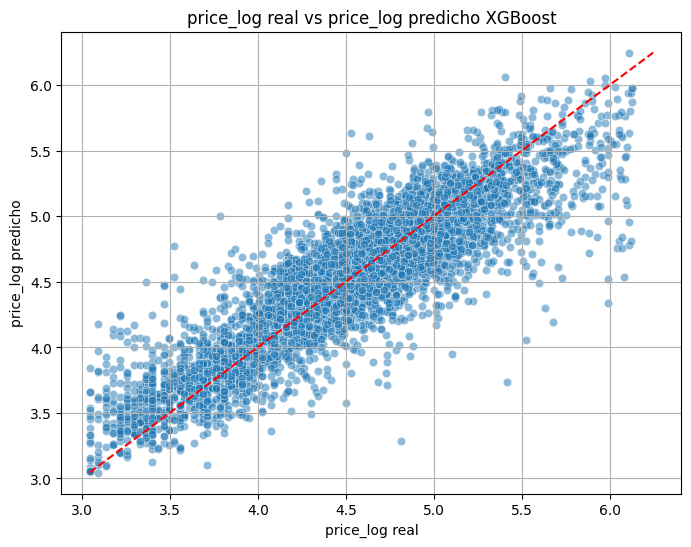

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)

max_val = max(max(y_test), max(y_test_pred))
min_val = min(min(y_test), min(y_test_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.xlabel('price_log real')
plt.ylabel('price_log predicho')
plt.title('price_log real vs price_log predicho XGBoost')
plt.grid(True)
plt.show()

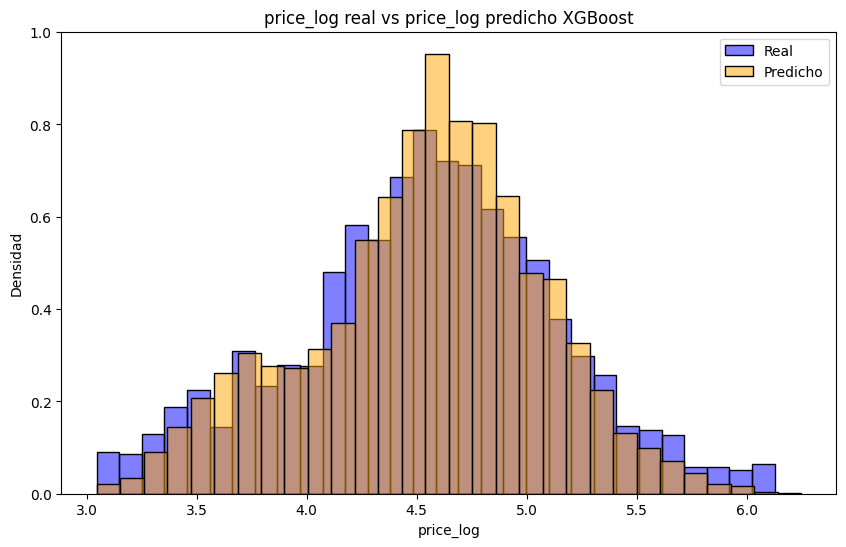

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Real', kde=False, stat="density", bins=30, alpha=0.5)
sns.histplot(y_test_pred, color='orange', label='Predicho', kde=False, stat="density", bins=30, alpha=0.5)
plt.title('price_log real vs price_log predicho XGBoost')
plt.xlabel('price_log')
plt.ylabel('Densidad')
plt.legend()
plt.show()

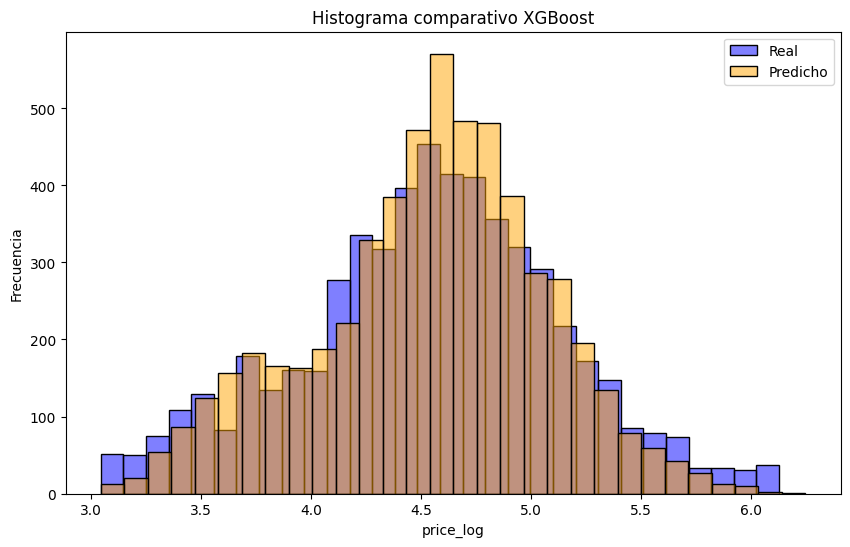

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Real', kde=False, stat="count", bins=30, alpha=0.5)
sns.histplot(y_test_pred, color='orange', label='Predicho', kde=False, stat="count", bins=30, alpha=0.5)
plt.title('Histograma comparativo XGBoost')
plt.xlabel('price_log')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


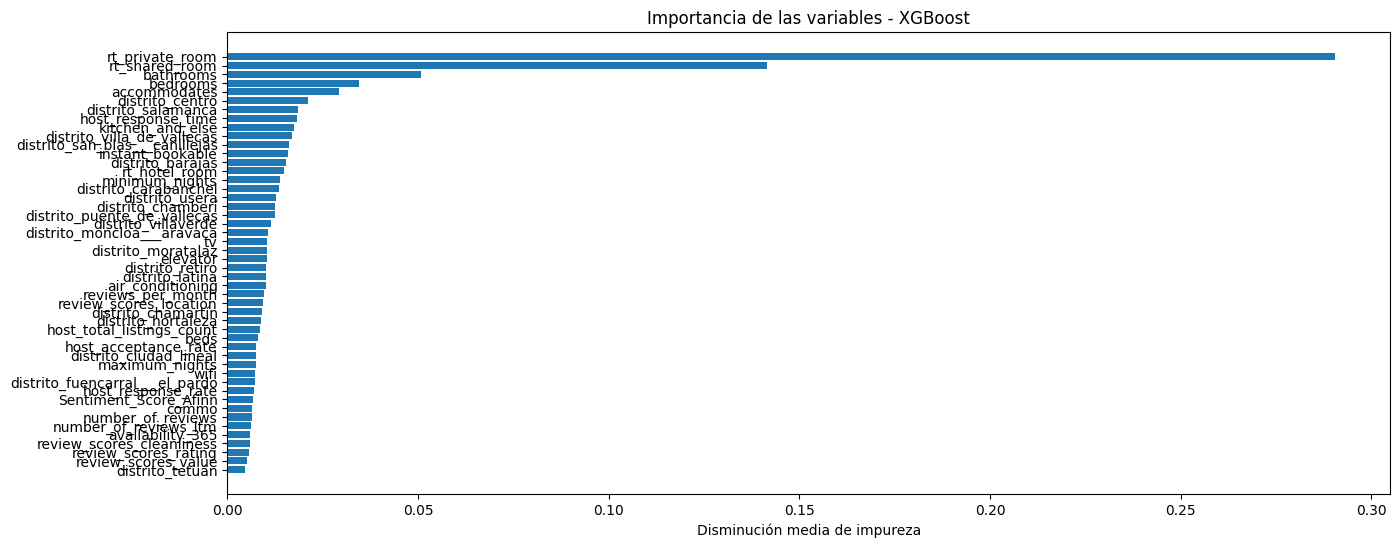

In [ ]:
# Variables importantes en train
importancias = xgb.feature_importances_
caracteristicas = X_train.columns

df_importancias = pd.DataFrame({
    'Variable': caracteristicas,
    'Importancia': importancias
})


df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)


plt.figure(figsize=(15, 6))
plt.barh(df_importancias['Variable'], df_importancias['Importancia'])
plt.gca().invert_yaxis()
plt.title('Importancia de las variables - XGBoost')
plt.xlabel('Disminución media de impureza')
plt.show()

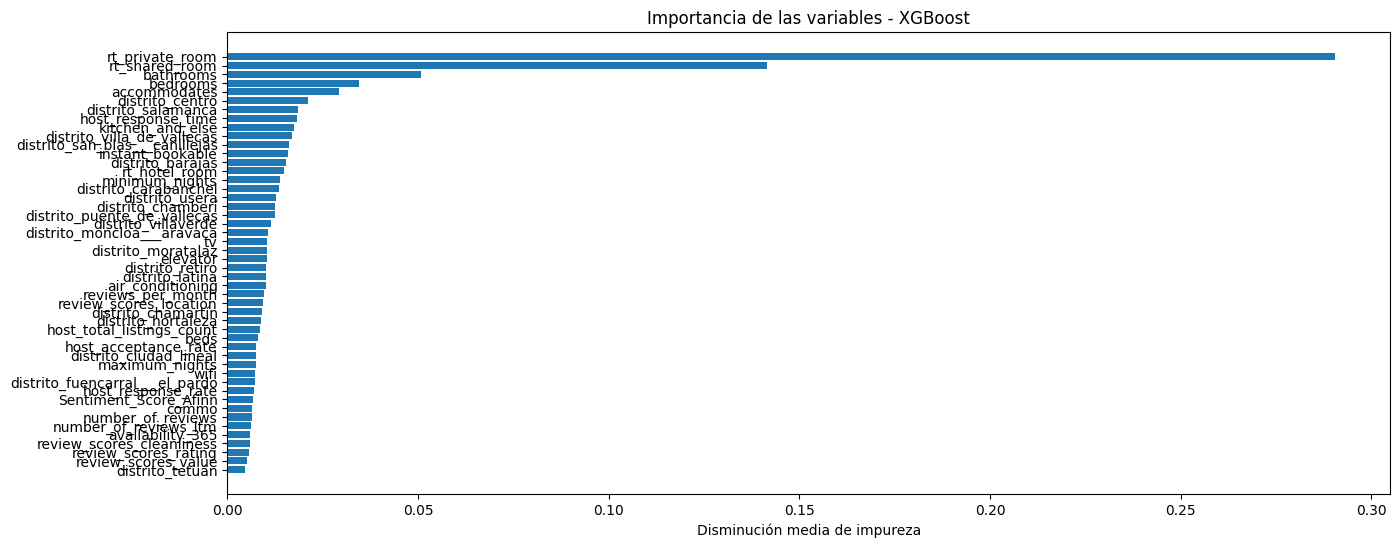

In [ ]:
# Variables importantes en test
importancias = xgb.feature_importances_
caracteristicas = X_test.columns

df_importancias = pd.DataFrame({
    'Variable': caracteristicas,
    'Importancia': importancias
})


df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)


plt.figure(figsize=(15, 6))
plt.barh(df_importancias['Variable'], df_importancias['Importancia'])
plt.gca().invert_yaxis()
plt.title('Importancia de las variables - XGBoost')
plt.xlabel('Disminución media de impureza')
plt.show()

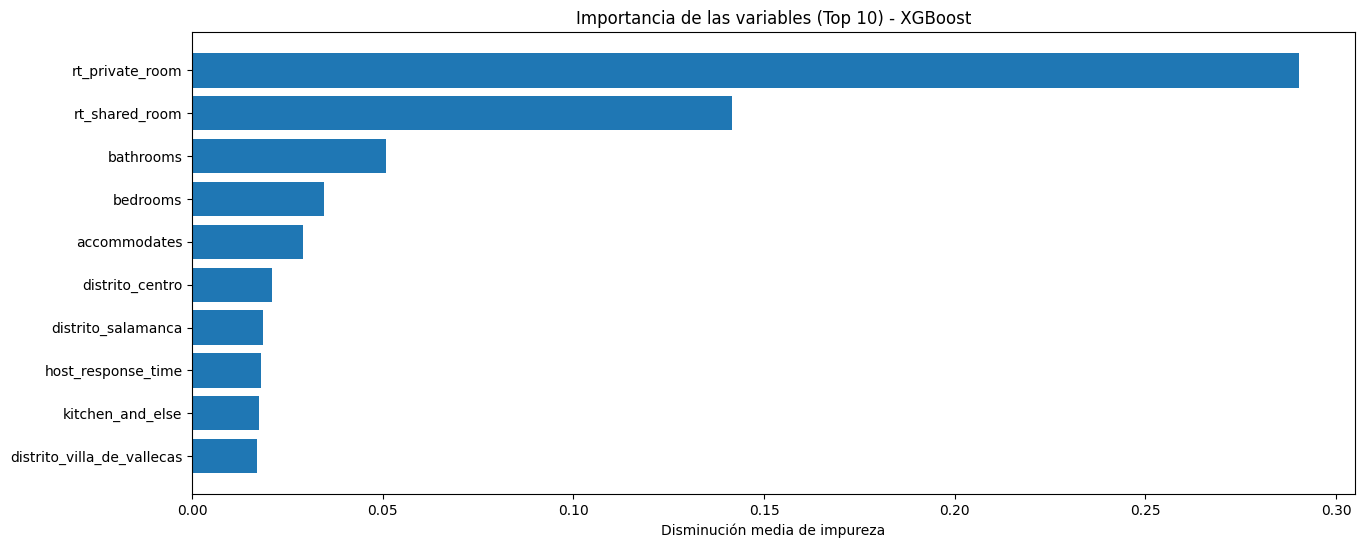

In [ ]:
# Top 10 variables importantes en train
importancias = xgb.feature_importances_
caracteristicas = X_train.columns

df_importancias = pd.DataFrame({
    'Variable': caracteristicas,
    'Importancia': importancias
})

df_importancias = df_importancias.sort_values(by='Importancia', ascending=False).head(10)

plt.figure(figsize=(15, 6))
plt.barh(df_importancias['Variable'], df_importancias['Importancia'])
plt.gca().invert_yaxis()
plt.title('Importancia de las variables (Top 10) - XGBoost')
plt.xlabel('Disminución media de impureza')
plt.show()

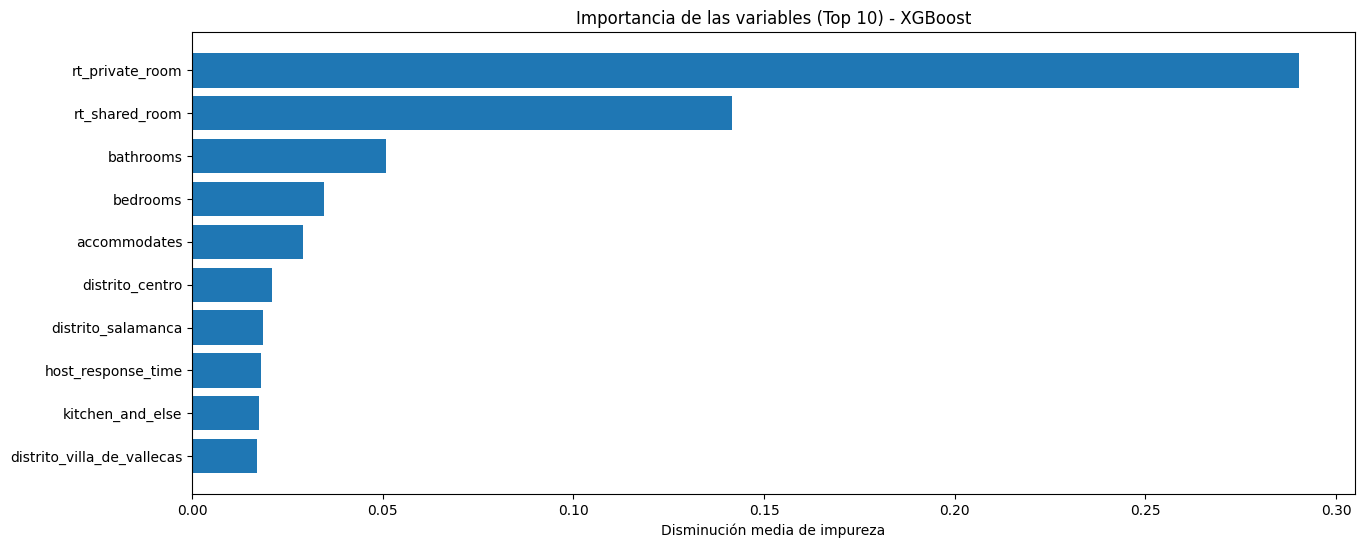

In [ ]:
# Top 10 variables importantes en test
importancias = xgb.feature_importances_
caracteristicas = X_test.columns

df_importancias = pd.DataFrame({
    'Variable': caracteristicas,
    'Importancia': importancias
})

df_importancias = df_importancias.sort_values(by='Importancia', ascending=False).head(10)

plt.figure(figsize=(15, 6))
plt.barh(df_importancias['Variable'], df_importancias['Importancia'])
plt.gca().invert_yaxis()
plt.title('Importancia de las variables (Top 10) - XGBoost')
plt.xlabel('Disminución media de impureza')
plt.show()

####**Red Neuronal**

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import random

In [ ]:
X = listings.drop(columns=['price_log','id'])
y = listings['price_log']

In [ ]:
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, ids, test_size=0.3, random_state=42)

In [ ]:
# Seleccionar mismas variables que en gradient boosting
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)


importances = pd.Series(gb.feature_importances_, index=X.columns)
top_vars = importances.sort_values(ascending=False).head(30).index # cambiar 30 si el número de variables importantes es distinto

In [ ]:
X_train=X_train[top_vars]
X_test=X_test[top_vars]

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# función de definición de hiperparámetros de búsqueda con keras_tuner

def build_model(hp):
    model = Sequential()

    # Capa inicial
    model.add(Dense(
        units=hp.Int('units_input', min_value=64, max_value=128, step=32), # en general, da buenos resultados con estos números de neuronas. Definir distinto número para probar
        activation='relu',
        input_dim=X_train.shape[1],
        kernel_regularizer=l2(hp.Choice('l2_lambda', [0.001, 0.01, 0.1]))
    ))

    # Número de capas ocultas (1-3)
    for i in range(hp.Int('n_hidden_layers', 1, 3)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32),
            activation='relu',
            kernel_regularizer=l2(hp.Choice('l2_lambda_hidden', [0.001, 0.01, 0.1]))
        ))
        model.add(Dropout(rate=hp.Choice('dropout_rate', [0.1, 0.2, 0.3, 0.4])))

    model.add(Dense(1))

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss='mse',
        metrics=['mae']
    )

    return model

In [ ]:
tuner = kt.GridSearch(
    hypermodel=build_model,
    objective='val_loss',
    max_trials=20, # definir número de modelos a probar
    executions_per_trial=1,
    overwrite=True,
    directory='keras_tuner_dir',
    project_name='price_prediction'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

tuner.search(X_train, y_train,
             validation_data=(X_test, y_test),
             epochs=100,
             batch_size=64,
             callbacks=[early_stopping],
             verbose=1)

Trial 20 Complete [00h 01m 32s]
val_loss: 0.12047417461872101

Best val_loss So Far: 0.11418953537940979
Total elapsed time: 00h 28m 45s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Mostrar cada hiperparámetro y su valor
for param in best_hps.values:
    print(f"{param}: {best_hps.get(param)}")

units_input: 64
l2_lambda: 0.001
n_hidden_layers: 1
units_0: 32
l2_lambda_hidden: 0.001
dropout_rate: 0.3
learning_rate: 0.0005


In [ ]:
# modelo con los hiperparámetros de arriba
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1)
])

# optimzador
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error', metrics=['mean_absolute_error'])

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# entrenar modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=64,  # tamaño del batch
    callbacks=[early_stopping]  # callback para usar early stopping
)

print("Model training completed.")

Epoch 1/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 12.3813 - mean_absolute_error: 3.1637 - val_loss: 0.9855 - val_mean_absolute_error: 0.6391
Epoch 2/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.4883 - mean_absolute_error: 0.9313 - val_loss: 0.6625 - val_mean_absolute_error: 0.4952
Epoch 3/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.3017 - mean_absolute_error: 0.8314 - val_loss: 0.5121 - val_mean_absolute_error: 0.4291
Epoch 4/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.0996 - mean_absolute_error: 0.7812 - val_loss: 0.4445 - val_mean_absolute_error: 0.3992
Epoch 5/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.9987 - mean_absolute_error: 0.7448 - val_loss: 0.3856 - val_mean_absolute_error: 0.3814
Epoch 6/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.9080 - mean_absolute_error: 0.7128 - val_loss: 0.3554 - val_mean_absolute_error: 0.3654
Epoch 7/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.8660 - mean_absolute_error: 

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

mse_train_log = mean_squared_error(y_train, y_train_pred)
rmse_train_log = root_mean_squared_error(y_train, y_train_pred)
r2_train_log = r2_score(y_train, y_train_pred)

mse_test_log = mean_squared_error(y_test, y_test_pred)
rmse_test_log = root_mean_squared_error(y_test, y_test_pred)
r2_test_log = r2_score(y_test, y_test_pred)

# métricas en euros
mse_test_euros = mean_squared_error(np.exp(y_test), np.exp(y_test_pred))
rmse_test_euros = np.sqrt(mse_test_euros)

In [ ]:
print("=== NN TRAIN ===")
print(f"R² log:   {r2_train_log:.4f}")
print(f"MSE log:  {mse_train_log:.4f}")
print(f"RMSE log: {rmse_train_log:.4f}")

print("\n=== NN TEST ===")
print(f"R² log:   {r2_test_log:.4f}")
print(f"MSE log:  {mse_test_log:.4f}")
print(f"RMSE log: {rmse_test_log:.4f}")

In [ ]:
print(f'El MSE en euros es {mse_test_euros} y el RMSE es {rmse_test_euros}')

In [ ]:
rmse_test_log/(np.max(y_test)-np.min(y_test))

In [ ]:
# rmse en euros sobre rango en euros
y_test_euros=np.exp(y_test)
rmse_test_euros/(np.max(y_test_euros)-np.min(y_test_euros))

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Early Stopping: Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

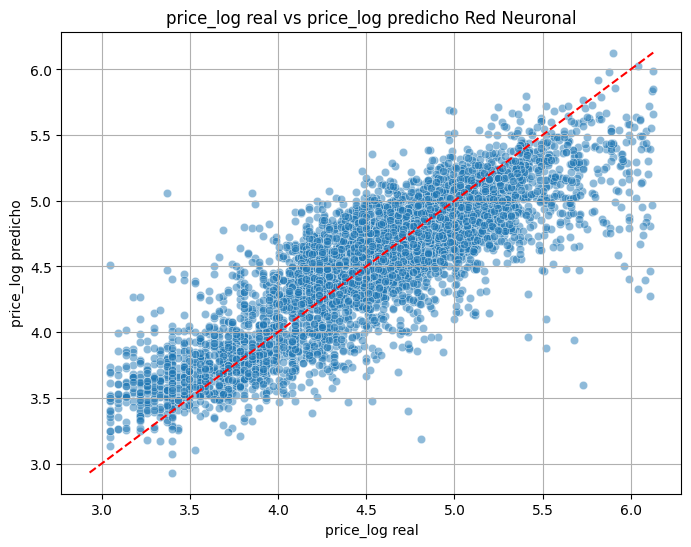

In [ ]:
y_test_pred = y_test_pred.ravel() #.ravel importante para que funcione

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)

max_val = max(max(y_test), max(y_test_pred))
min_val = min(min(y_test), min(y_test_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.xlabel('price_log real')
plt.ylabel('price_log predicho')
plt.title('price_log real vs price_log predicho Red Neuronal')
plt.grid(True)
plt.show()


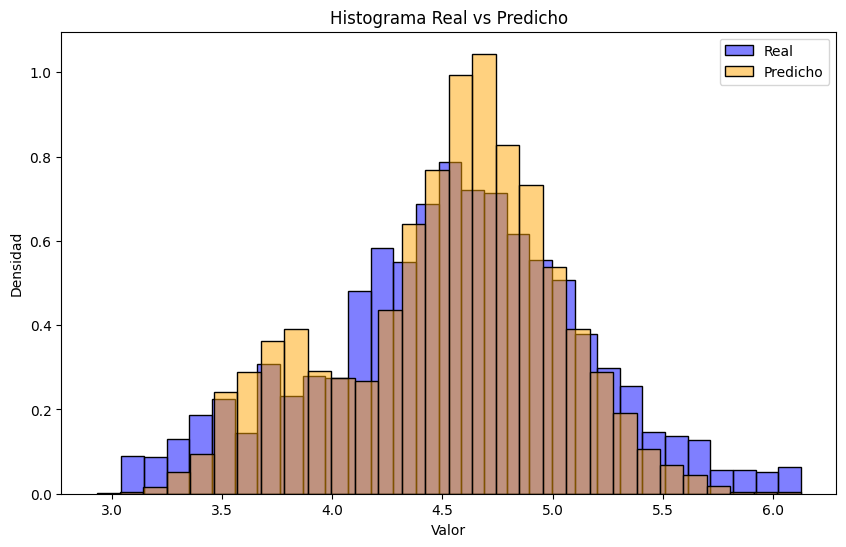

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Real', kde=False, stat="density", bins=30, alpha=0.5)
sns.histplot(y_test_pred, color='orange', label='Predicho', kde=False, stat="density", bins=30, alpha=0.5)
plt.title('Histograma Real vs Predicho')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

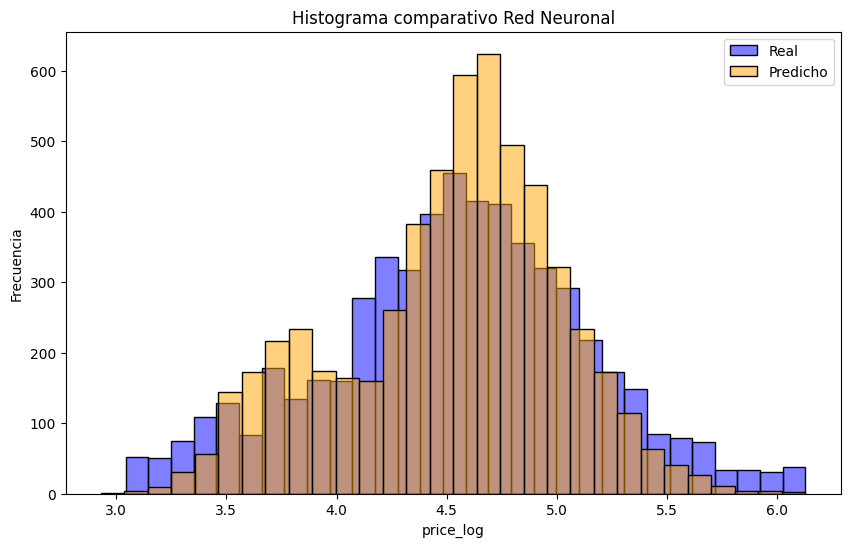

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Real', kde=False, stat="count", bins=30, alpha=0.5)
sns.histplot(y_test_pred, color='orange', label='Predicho', kde=False, stat="count", bins=30, alpha=0.5)
plt.title('Histograma comparativo Red Neuronal')
plt.xlabel('price_log')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()